In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import style
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [142]:
dfconfirmIndia=pd.read_csv('/content/IndiaALL.csv', index_col=[0], parse_dates=[0])

dfconfirmBangladesh=pd.read_csv('/content/bangladeshAll.csv' ,index_col=[0], parse_dates=[0])

dfconfirmJapan=pd.read_csv('/content/JapanAll.csv' ,index_col=[0], parse_dates=[0] )


dfconfirmFrance=pd.read_csv('/content/FranceAll.csv' ,index_col=[0], parse_dates=[0])

dfconfirmGermany=pd.read_csv('/content/GermanyAll.csv'  ,index_col=[0], parse_dates=[0])

dfconfirmItaly=pd.read_csv('/content/ItalyAll.csv' ,index_col=[0], parse_dates=[0] )


dfconfirmNewzeland=pd.read_csv('/content/NewZelandAll.csv'  ,index_col=[0], parse_dates=[0])


dfconfirmPakistan=pd.read_csv('/content/PakistanAll.csv' ,index_col=[0], parse_dates=[0])


In [143]:
dfdeathIndia=pd.read_csv('/content/IndiaALL.csv', index_col=[0], parse_dates=[0])

dfdeathBangladesh=pd.read_csv('/content/bangladeshAll.csv' ,index_col=[0], parse_dates=[0])

dfdeathJapan=pd.read_csv('/content/JapanAll.csv' ,index_col=[0], parse_dates=[0] )


dfdeathFrance=pd.read_csv('/content/FranceAll.csv' ,index_col=[0], parse_dates=[0])

dfdeathGermany=pd.read_csv('/content/GermanyAll.csv'  ,index_col=[0], parse_dates=[0])

dfdeathItaly=pd.read_csv('/content/ItalyAll.csv' ,index_col=[0], parse_dates=[0] )


dfdeathNewzeland=pd.read_csv('/content/NewZelandAll.csv'  ,index_col=[0], parse_dates=[0])


dfdeathPakistan=pd.read_csv('/content/PakistanAll.csv' ,index_col=[0], parse_dates=[0])


In [144]:
def Confirem(df,str,str2):
  #df['Confirmed'] = df['Confirmed'].astype(float)
  df=df.drop(['C','D','Death'],axis=1)
 
  df_full2=df
  split_date = '31-Oct-2022'
  df.drop(df.loc[df.index > split_date].index, inplace = True)
 # color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
  #_ = df.plot( figsize=(15,5), color=color_pal[0], title=str)
  split_date = '31-Aug-2022'
  df_train = df.loc[df.index <= split_date].copy()
  df_test = df.loc[df.index > split_date].copy()
  #_ = df_test \
   # .rename(columns={'Confirmed': 'TEST SET'}) \
    #.join(df_train.rename(columns={'Confirmed': 'TRAINING SET'}), how='outer') \
    #.plot(figsize=(15,5), title=str)

  
  

  def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
  
  X_train, y_train = create_features(df_train, label='Confirmed')
  X_test, y_test = create_features(df_test, label='Confirmed')
  X_all,y_all=create_features(df, label='Confirmed')

  reg = xgb.XGBRegressor(n_estimators=1000)
  reg.fit(X_train, y_train, verbose=False)
  df_test['Confirmed_Prediction'] = reg.predict(X_test)
  df_all = pd.concat([df_test, df_train], sort=False)
  #_ = df_all[['Confirmed','Confirmed_Prediction']].plot(figsize=(15, 5),title=str)

  plt.figure(figsize=(16, 9))

  df_train['Confirmed'].plot(legend=True)
  df_test['Confirmed'].plot(legend=True)
  df_all['Confirmed_Prediction'].plot(legend=True)

  #pred.plot(legend=True)
  

  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Connfirmed Cases', size=30)
  plt.legend(['Train Case','Test Case', 'XGBooostPrediction'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()


  
  df_full2['fullConfirmed_Prediction'] = reg.predict(X_all) 
  df_full2['fullConfirmed_Prediction']=df_full2['fullConfirmed_Prediction'].abs().round().astype('int')
  #_ = df_full2[['Confirmed','fullConfirmed_Prediction']].plot(figsize=(15, 5),title=str)

 

  
  
 
  style.use('fivethirtyeight')
  plt.figure(figsize=(16, 9))
  df_full2['Confirmed'].plot(legend=True,linestyle = 'dotted')
  df_full2['fullConfirmed_Prediction'].plot(legend=True ,linestyle ='dotted')
  
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Connfirmed Cases', size=30)
  plt.legend(['Total Confirm Case', 'XGBoost Prediction from beginning'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()



  
  mae=mean_absolute_error(y_true=df_test['Confirmed'], y_pred=df_test['Confirmed_Prediction'])
  print("MAE : % f" %(mae))
  print('MSE:',mean_squared_error(y_true=df_test['Confirmed'], y_pred=df_test['Confirmed_Prediction']))
  
  rmse = np.sqrt(mean_squared_error(y_true=df_test['Confirmed'], y_pred=df_test['Confirmed_Prediction']))
  print("RMSE : % f" %(rmse))

  mae=mean_absolute_error(y_true=df_full2['Confirmed'], y_pred=df_full2['fullConfirmed_Prediction'])
  print("f MAE : % f" %(mae))
  print('f MSE:',mean_squared_error(y_true=df_full2['Confirmed'], y_pred=df_full2['fullConfirmed_Prediction']))
  
  rmse = np.sqrt(mean_squared_error(y_true=df_full2['Confirmed'], y_pred=df_full2['fullConfirmed_Prediction']))
  print(" f RMSE : % f" %(rmse))
  print("R2 Score:",r2_score(y_true=df_test['Confirmed'], y_pred=df_test['Confirmed_Prediction']))
  print("f R2 Score:",r2_score(y_true=df_full2['Confirmed'], y_pred=df_full2['fullConfirmed_Prediction']))

  def create_features1(df, target_variable):
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear

    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if target_variable:
        y = df[target_variable]
        return X, y
    return X
  dti = pd.date_range("2022-11-01 ", periods=20, freq="D")
  df_future_dates = pd.DataFrame(dti, columns = ['Date'])
  df_future_dates['Irr'] = np.nan
  df_future_dates.index = pd.to_datetime(df_future_dates['Date'], format='%Y-%m-%d %H:%M:%S')
  df_future_dates_copy = df_future_dates.copy()
  testX_future, testY_future = create_features1(df_future_dates, target_variable='Irr')
  reg.fit(X_train, y_train,verbose=False)  # Change verbose to True if you want to see it train
  yhat1 = reg.predict(testX_future)
  poly_df = pd.DataFrame({'Date': dti, str2: yhat1})
  poly_df[str2]=poly_df[str2].abs().round().astype('int')
  poly_df.plot(x='Date', y=str2,figsize=(15, 5),title=str2) 

  


  return poly_df
 
  








In [145]:
def Death(df,str,str2):
  #df['Confirmed'] = df['Confirmed'].astype(float)
  df=df.drop(['C','D','Confirmed'],axis=1)
  df_full2=df  
  split_date = '31-Oct-2022'
  df.drop(df.loc[df.index > split_date].index, inplace = True)
  color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
  #_ = df.plot( figsize=(15,5), color=color_pal[0], title=str)
  split_date = '31-Aug-2022'
  df_train = df.loc[df.index <= split_date].copy()
  df_test = df.loc[df.index > split_date].copy()
  #_ = df_test \
    #.rename(columns={'Death': 'TEST SET'}) \
    #.join(df_train.rename(columns={'Death': 'TRAINING SET'}), how='outer') \
    #.plot(figsize=(15,5), title=str)

  def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
  
  X_train, y_train = create_features(df_train, label='Death')
  X_test, y_test = create_features(df_test, label='Death')
  X_all,y_all=create_features(df, label='Death')
  reg = xgb.XGBRegressor(n_estimators=1000)
  reg.fit(X_train, y_train, verbose=False)
  df_test['Death_Prediction'] = reg.predict(X_test)
  df_all = pd.concat([df_test, df_train], sort=False)
 #_ = df_all[['Death','Death_Prediction']].plot(figsize=(15, 5),title=str)

  plt.figure(figsize=(16, 9))

  df_train['Death'].plot(legend=True)
  df_test['Death'].plot(legend=True)
  df_all['Death_Prediction'].plot(legend=True)

  #pred.plot(legend=True)
  

  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Death Cases', size=30)
  plt.legend(['Train Case','Test Case', 'XGBooostPrediction'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()

  
  df_full2['fullDeath_Prediction'] = reg.predict(X_all) 
  #_ = df_full2[['Death','fullDeath_Prediction']].plot(figsize=(15, 5),title=str)

  style.use('fivethirtyeight')
  plt.figure(figsize=(16, 9))
  df_full2['Death'].plot(legend=True,linestyle = 'dotted')
  df_full2['fullDeath_Prediction'].plot(legend=True ,linestyle ='dotted')
  
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Connfirmed Cases', size=30)
  plt.legend(['Total Death Case', 'XGBoost Prediction from beginning'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()




  mae=mean_absolute_error(y_true=df_test['Death'], y_pred=df_test['Death_Prediction'])
  print("MAE : % f" %(mae))
  print('MSE:',mean_squared_error(y_true=df_test['Death'], y_pred=df_test['Death_Prediction']))
  rmse = np.sqrt(mean_squared_error(y_true=df_test['Death'], y_pred=df_test['Death_Prediction']))
  print("RMSE : % f" %(rmse))
  print("R2 Score:",r2_score(y_true=df_test['Death'], y_pred=df_test['Death_Prediction']))

  mae=mean_absolute_error(y_true=df_full2['Death'], y_pred=df_full2['fullDeath_Prediction'])
  print("f MAE : % f" %(mae))
  print('f MSE:',mean_squared_error(y_true=df_full2['Death'], y_pred=df_full2['fullDeath_Prediction']))
  
  rmse = np.sqrt(mean_squared_error(y_true=df_full2['Death'], y_pred=df_full2['fullDeath_Prediction']))
  print(" f RMSE : % f" %(rmse))
 
  print("f R2 Score:",r2_score(y_true=df_full2['Death'], y_pred=df_full2['fullDeath_Prediction']))

  def create_features1(df, target_variable):
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear

    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if target_variable:
        y = df[target_variable]
        return X, y
    return X
  dti = pd.date_range("2022-11-01 ", periods=20, freq="D")
  df_future_dates = pd.DataFrame(dti, columns = ['Date'])
  df_future_dates['Irr'] = np.nan
  df_future_dates.index = pd.to_datetime(df_future_dates['Date'], format='%Y-%m-%d %H:%M:%S')
  df_future_dates_copy = df_future_dates.copy()
  testX_future, testY_future = create_features1(df_future_dates, target_variable='Irr')
  reg.fit(X_train, y_train,verbose=False)  # Change verbose to True if you want to see it train
  yhat1 = reg.predict(testX_future)
  poly_df = pd.DataFrame({'Date': dti, str2: yhat1})
  poly_df[str2]=poly_df[str2].abs().round().astype('int')
  poly_df.plot(x='Date', y=str2,figsize=(15, 5),title=str2)
  
 
  return poly_df








<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


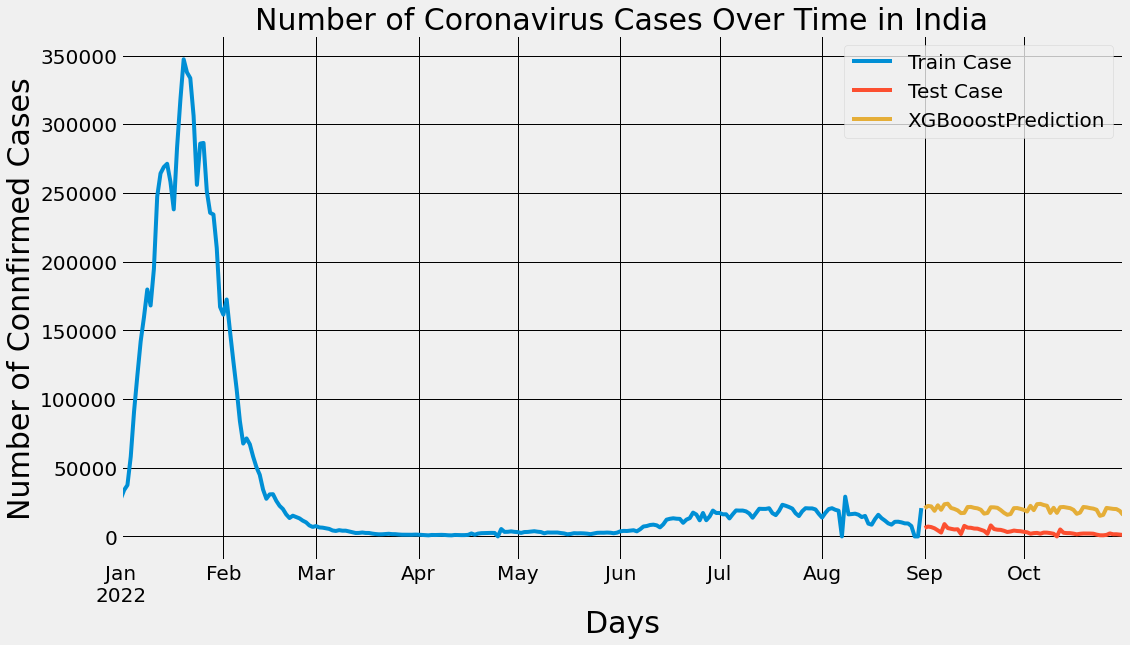

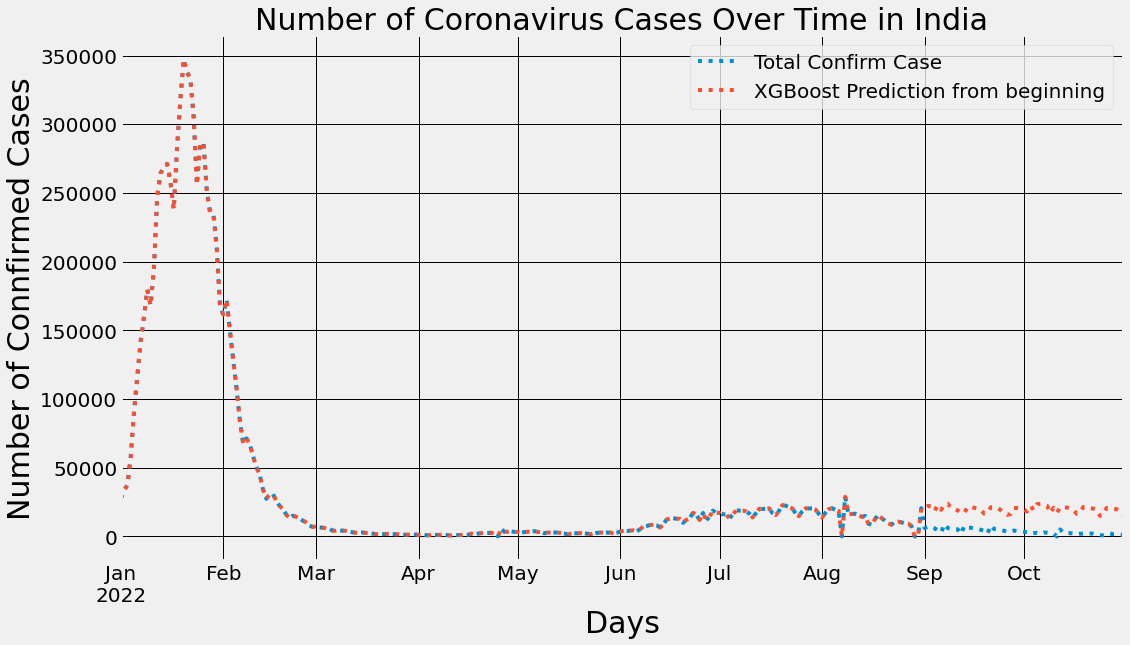

MAE :  16247.901815
MSE: 269688153.2230762
RMSE :  16422.184788
f MAE :  3319.792763
f MSE: 54122557.628289476
 f RMSE :  7356.803493
R2 Score: -63.499258058298935
f R2 Score: 0.9891533094212368
[03:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


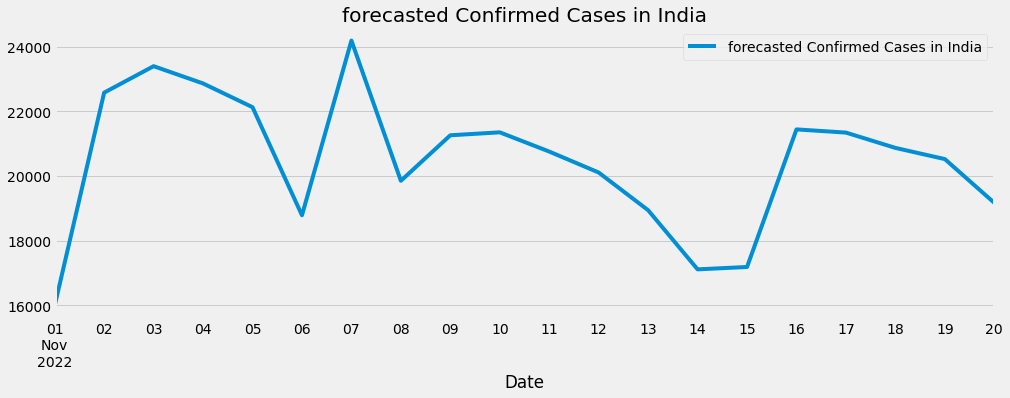

In [146]:
forecastedIndia=Confirem(dfconfirmIndia,'Number of Coronavirus Cases Over Time in India','forecasted Confirmed Cases in India')


In [147]:
forecastedIndia

Date  forecasted Confirmed Cases in India
0  2022-11-01                                15990
1  2022-11-02                                22574
2  2022-11-03                                23392
3  2022-11-04                                22858
4  2022-11-05                                22124
5  2022-11-06                                18784
6  2022-11-07                                24184
7  2022-11-08                                19849
8  2022-11-09                                21256
9  2022-11-10                                21347
10 2022-11-11                                20753
11 2022-11-12                                20105
12 2022-11-13                                18940
13 2022-11-14                                17112
14 2022-11-15                                17185
15 2022-11-16                                21438
16 2022-11-17                                21339
17 2022-11-18                                20866
18 2022-11-19                                20520
19 2022-11-20                                19168

<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


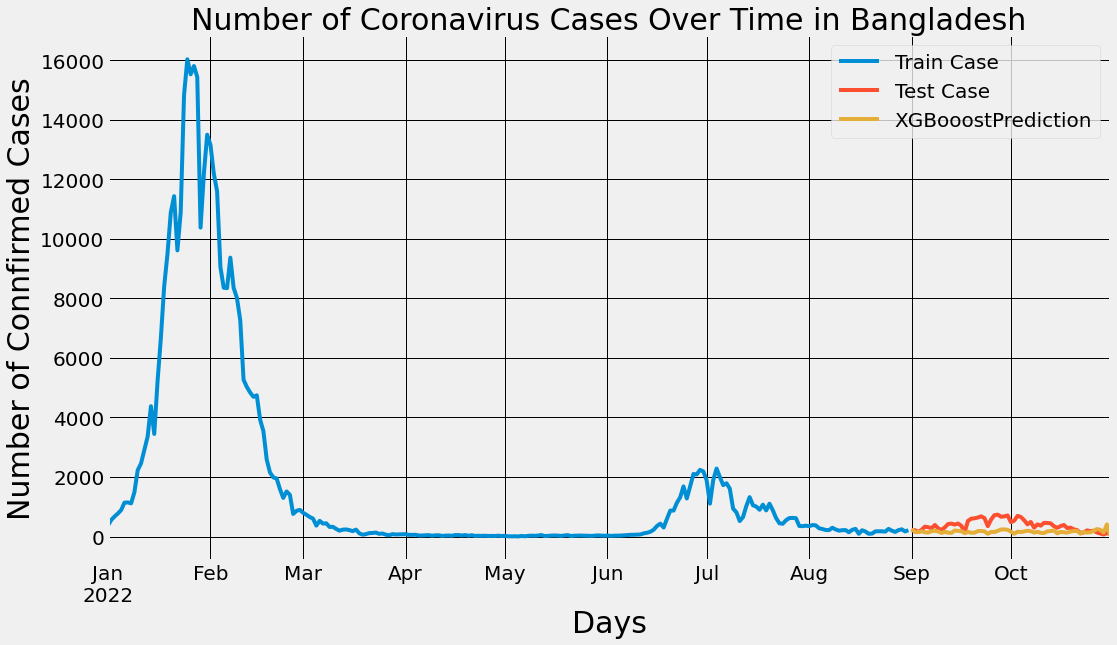

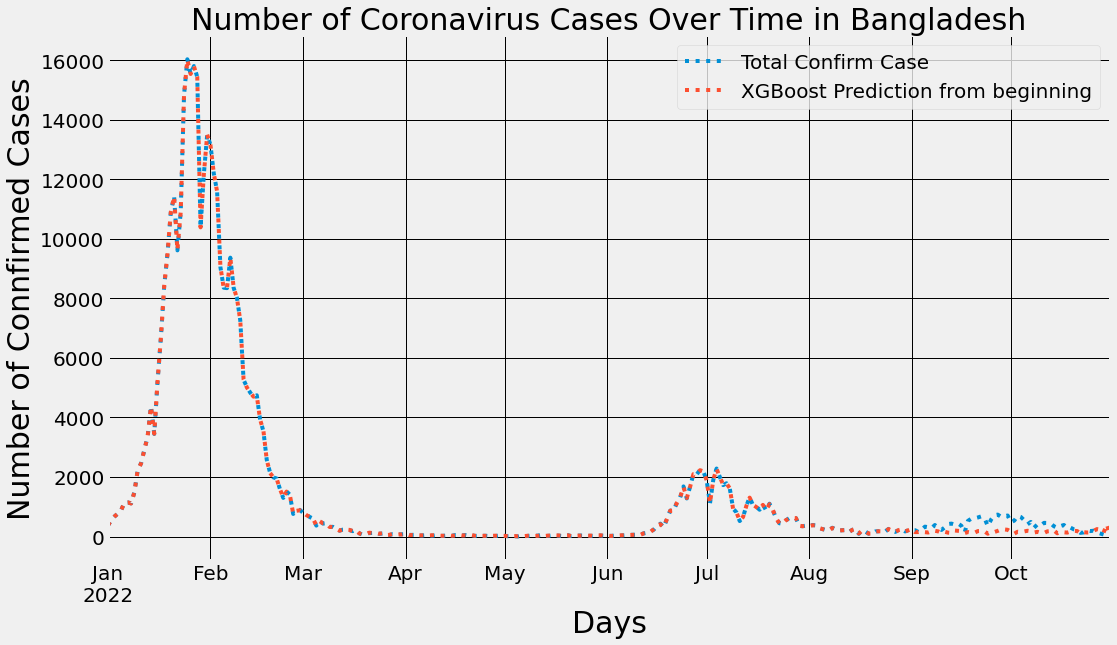

MAE :  237.025187
MSE: 82708.05538242855
RMSE :  287.590082
f MAE :  52.476974
f MSE: 16651.003289473683
 f RMSE :  129.038767
R2 Score: -1.3936827658299662
f R2 Score: 0.9982912007612902
[03:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


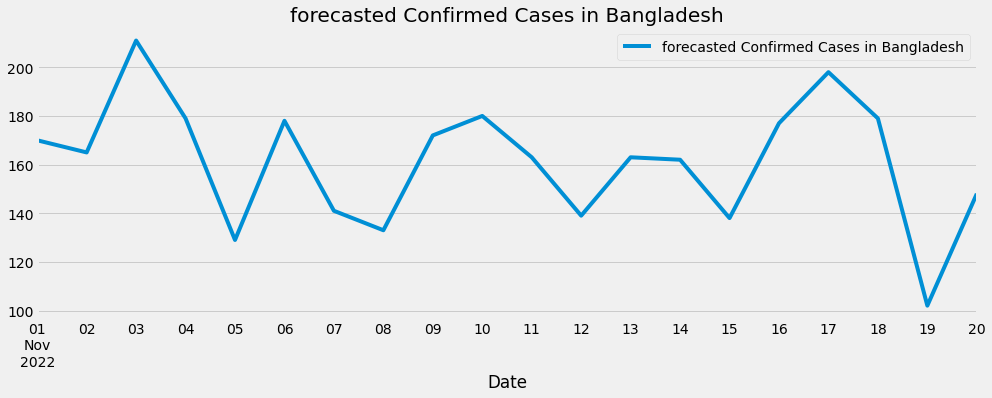

In [148]:
forecastedBangladesh=Confirem(dfconfirmBangladesh,'Number of Coronavirus Cases Over Time in Bangladesh','forecasted Confirmed Cases in Bangladesh')

In [149]:
forecastedBangladesh

Date  forecasted Confirmed Cases in Bangladesh
0  2022-11-01                                       170
1  2022-11-02                                       165
2  2022-11-03                                       211
3  2022-11-04                                       179
4  2022-11-05                                       129
5  2022-11-06                                       178
6  2022-11-07                                       141
7  2022-11-08                                       133
8  2022-11-09                                       172
9  2022-11-10                                       180
10 2022-11-11                                       163
11 2022-11-12                                       139
12 2022-11-13                                       163
13 2022-11-14                                       162
14 2022-11-15                                       138
15 2022-11-16                                       177
16 2022-11-17                                       198
17 2022-11-18                                       179
18 2022-11-19                                       102
19 2022-11-20                                       148

<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


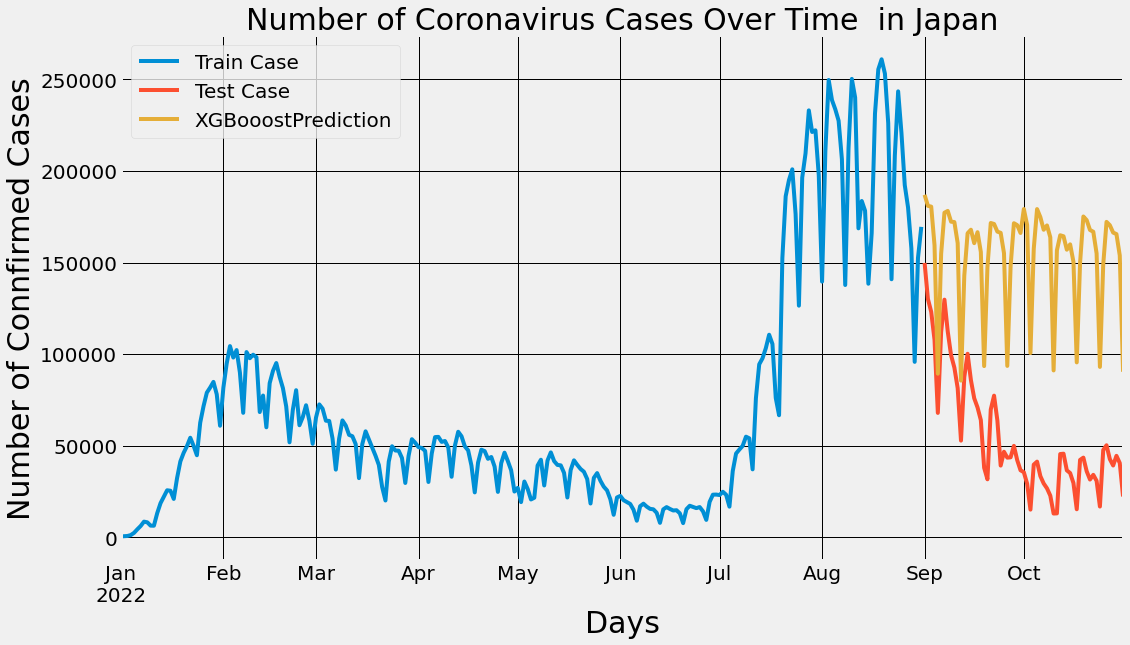

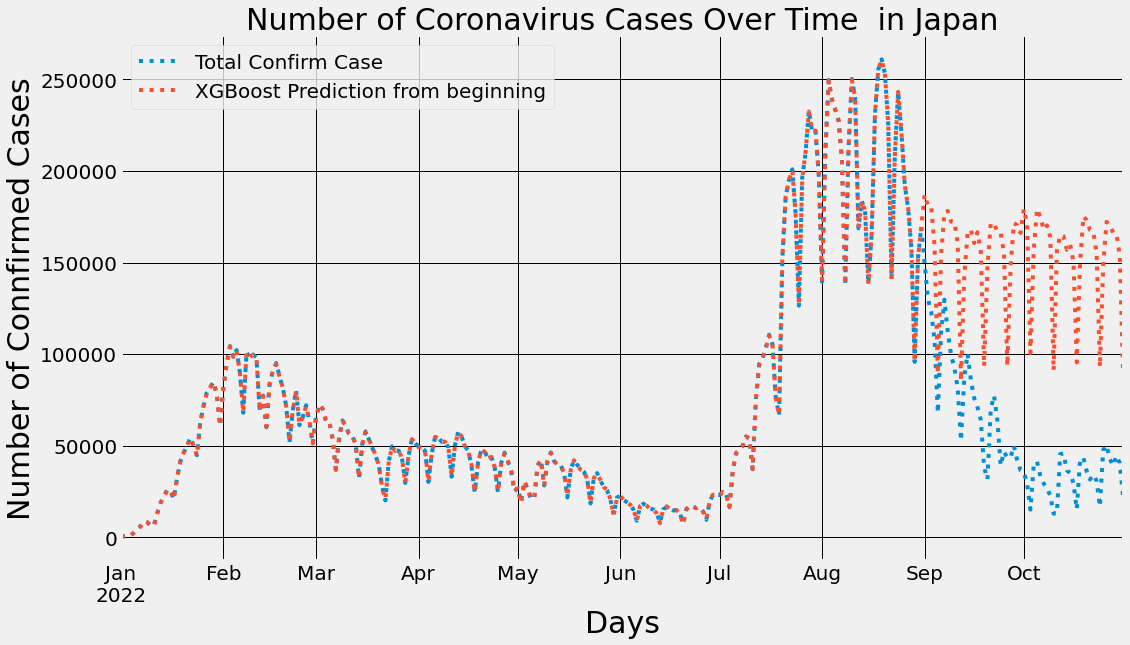

MAE :  99599.453125
MSE: 11041890096.926586
RMSE :  105080.398253
f MAE :  20157.585526
f MSE: 2215703831.3289475
 f RMSE :  47071.263328
R2 Score: -9.489364859065594
f R2 Score: 0.3964671425307511
[03:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


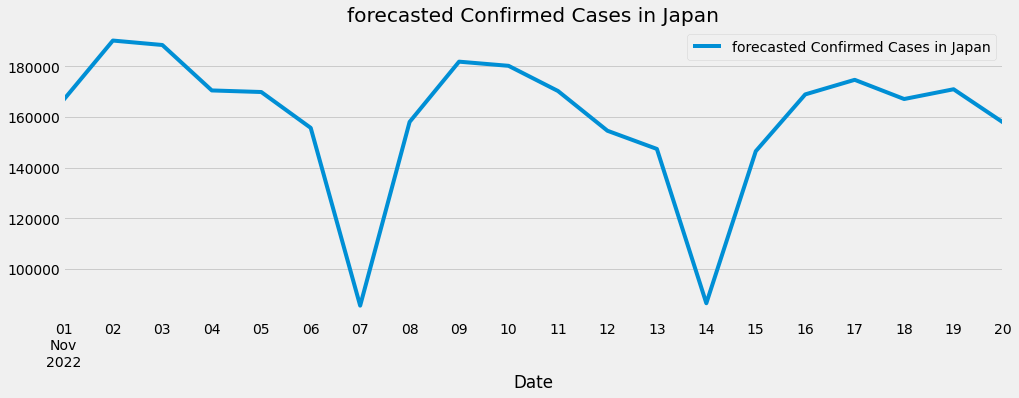

In [150]:
forecastedJapan=Confirem(dfconfirmJapan,'Number of Coronavirus Cases Over Time  in Japan','forecasted Confirmed Cases in Japan')

In [151]:
forecastedJapan

Date  forecasted Confirmed Cases in Japan
0  2022-11-01                               166635
1  2022-11-02                               190091
2  2022-11-03                               188338
3  2022-11-04                               170416
4  2022-11-05                               169795
5  2022-11-06                               155650
6  2022-11-07                                85532
7  2022-11-08                               158001
8  2022-11-09                               181765
9  2022-11-10                               180126
10 2022-11-11                               170194
11 2022-11-12                               154517
12 2022-11-13                               147340
13 2022-11-14                                86479
14 2022-11-15                               146447
15 2022-11-16                               168854
16 2022-11-17                               174602
17 2022-11-18                               167030
18 2022-11-19                               170882
19 2022-11-20                               157798

<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


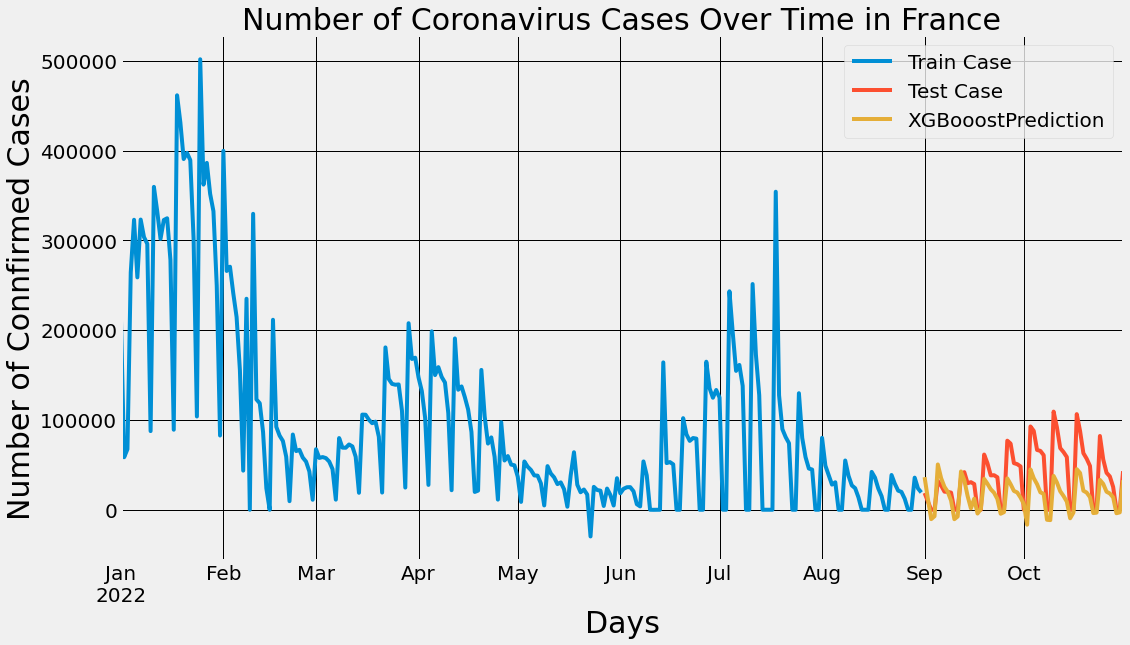

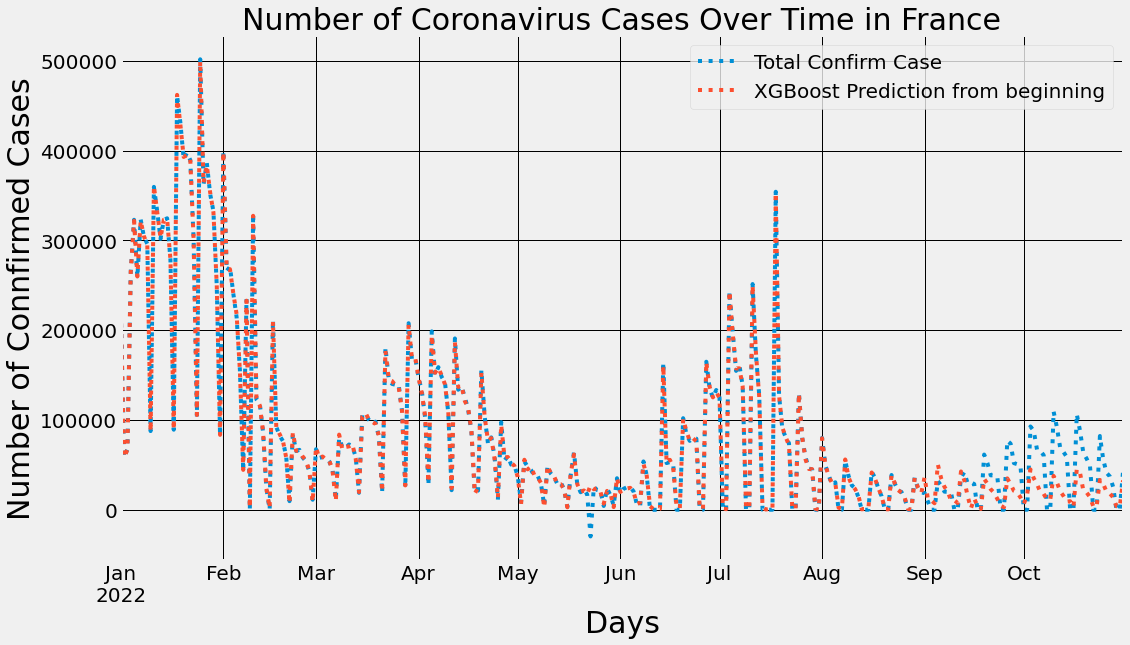

MAE :  23247.713941
MSE: 883067289.9498134
RMSE :  29716.448138
f MAE :  6009.687500
f MSE: 190409283.14144737
 f RMSE :  13798.887025
R2 Score: 0.11444305400849586
f R2 Score: 0.9810258297209409
[03:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


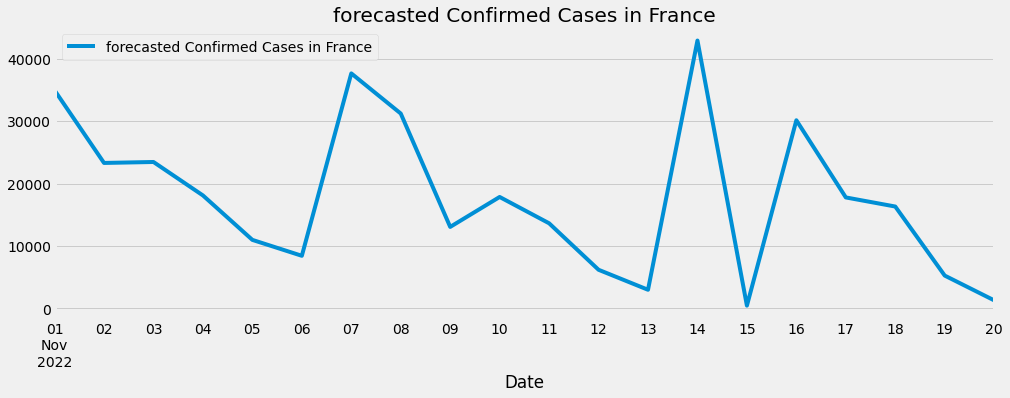

In [152]:
forecastedFrance=Confirem(dfconfirmFrance,'Number of Coronavirus Cases Over Time in France','forecasted Confirmed Cases in France')

In [153]:
forecastedFrance

Date  forecasted Confirmed Cases in France
0  2022-11-01                                 34930
1  2022-11-02                                 23298
2  2022-11-03                                 23452
3  2022-11-04                                 18096
4  2022-11-05                                 10979
5  2022-11-06                                  8433
6  2022-11-07                                 37636
7  2022-11-08                                 31209
8  2022-11-09                                 13058
9  2022-11-10                                 17851
10 2022-11-11                                 13637
11 2022-11-12                                  6195
12 2022-11-13                                  2993
13 2022-11-14                                 42894
14 2022-11-15                                   451
15 2022-11-16                                 30132
16 2022-11-17                                 17777
17 2022-11-18                                 16320
18 2022-11-19                                  5264
19 2022-11-20                                  1299

<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


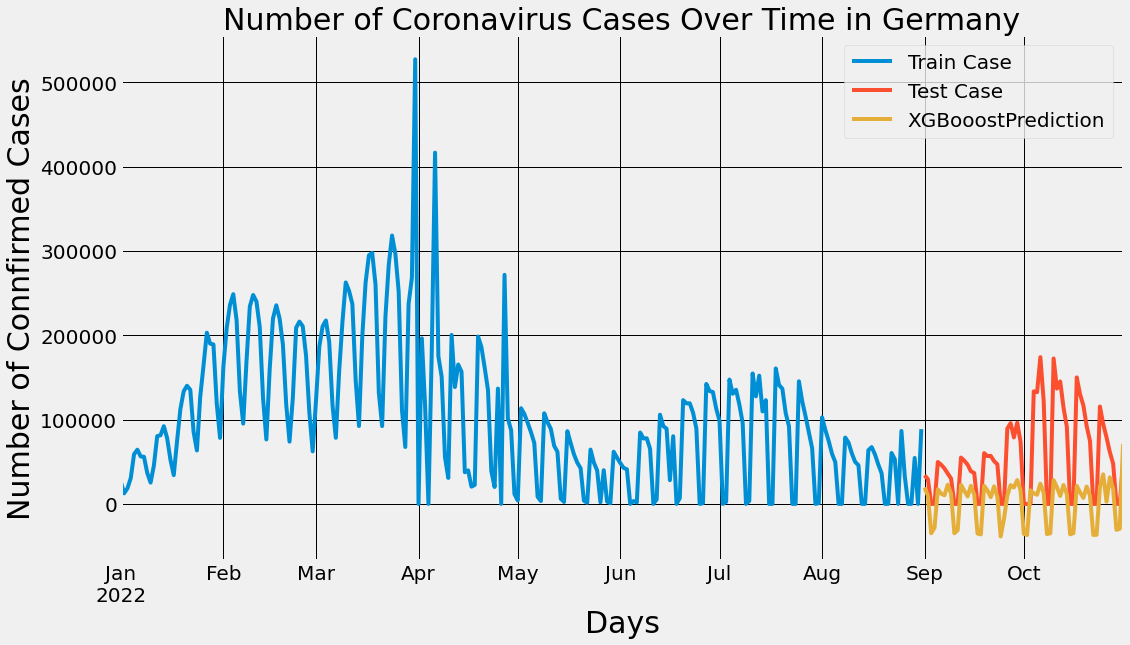

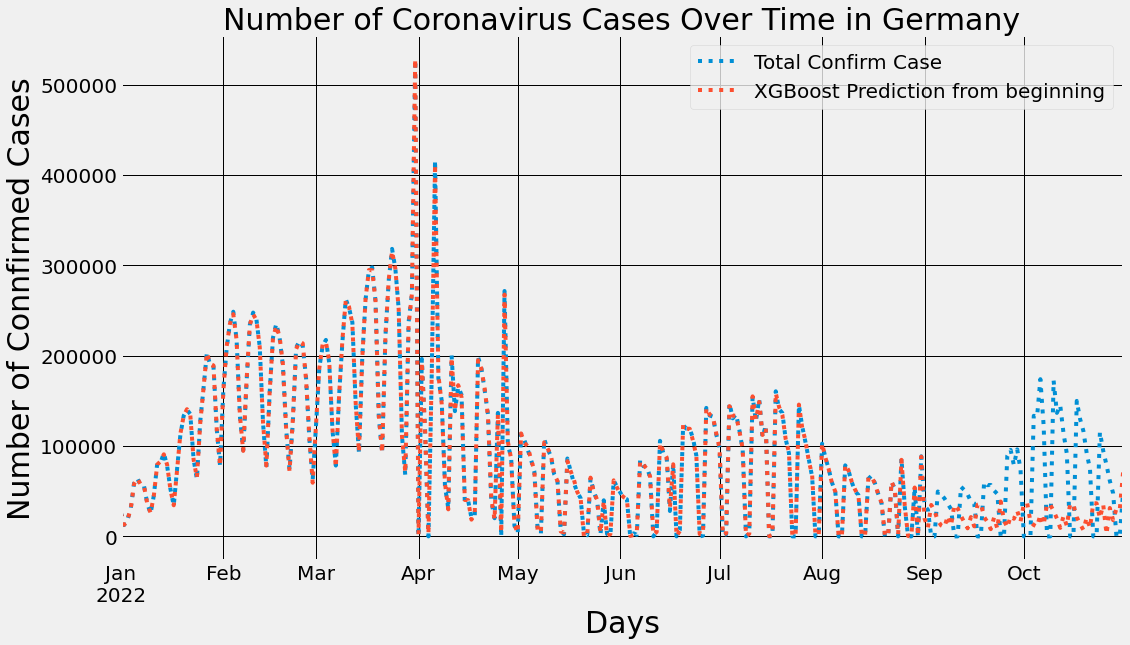

MAE :  54797.558930
MSE: 4342802268.597471
RMSE :  65899.941340
f MAE :  12042.802632
f MSE: 873686348.3552631
 f RMSE :  29558.185810
R2 Score: -0.6918673940753564
f R2 Score: 0.8687152642674049
[03:32:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


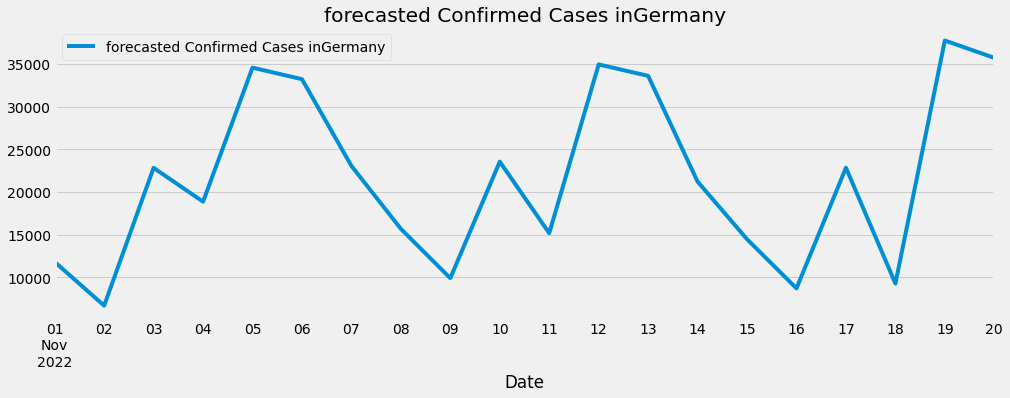

In [154]:
forecastedGermany=Confirem(dfconfirmGermany,'Number of Coronavirus Cases Over Time in Germany','forecasted Confirmed Cases inGermany')

In [155]:
forecastedGermany

Date  forecasted Confirmed Cases inGermany
0  2022-11-01                                 11791
1  2022-11-02                                  6670
2  2022-11-03                                 22821
3  2022-11-04                                 18860
4  2022-11-05                                 34569
5  2022-11-06                                 33218
6  2022-11-07                                 23053
7  2022-11-08                                 15673
8  2022-11-09                                  9890
9  2022-11-10                                 23548
10 2022-11-11                                 15166
11 2022-11-12                                 34949
12 2022-11-13                                 33607
13 2022-11-14                                 21210
14 2022-11-15                                 14457
15 2022-11-16                                  8700
16 2022-11-17                                 22835
17 2022-11-18                                  9261
18 2022-11-19                                 37747
19 2022-11-20                                 35720

<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


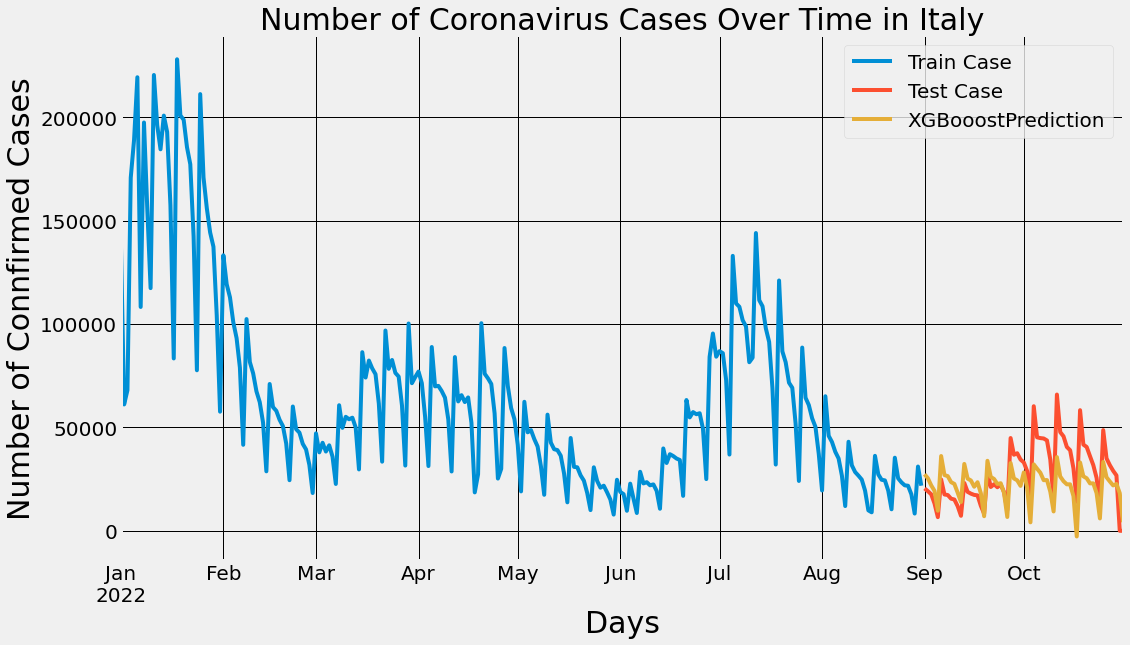

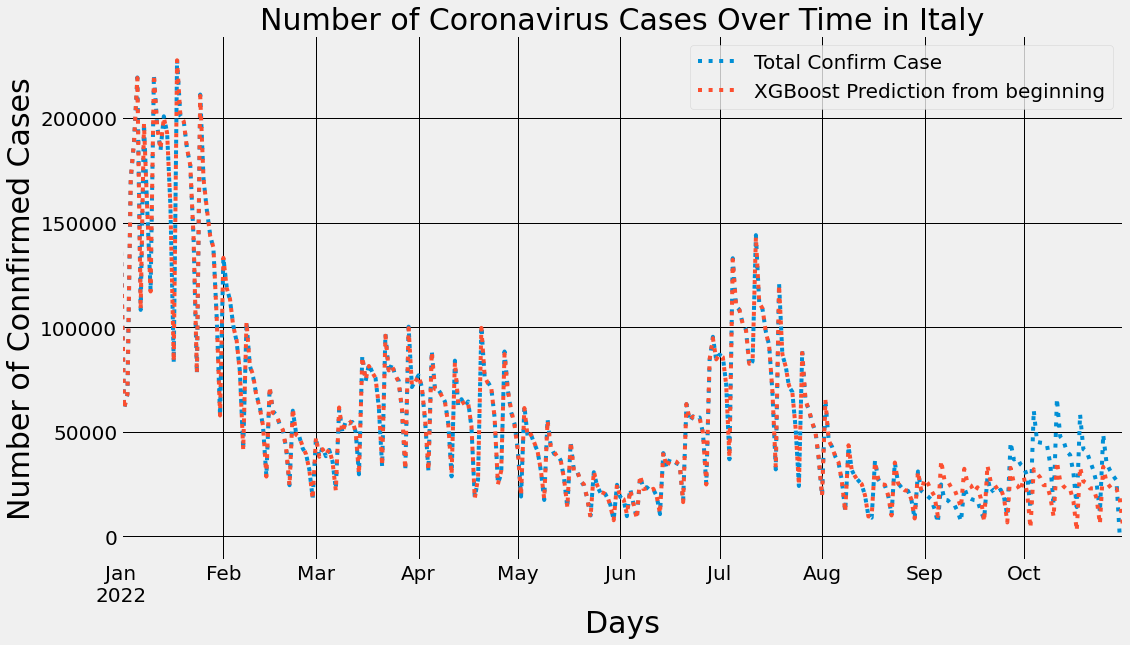

MAE :  10339.541720
MSE: 152103597.5346075
RMSE :  12333.028725
f MAE :  2380.253289
f MSE: 30223115.898026317
 f RMSE :  5497.555447
R2 Score: 0.29560149031114247
f R2 Score: 0.9855061570029273
[03:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


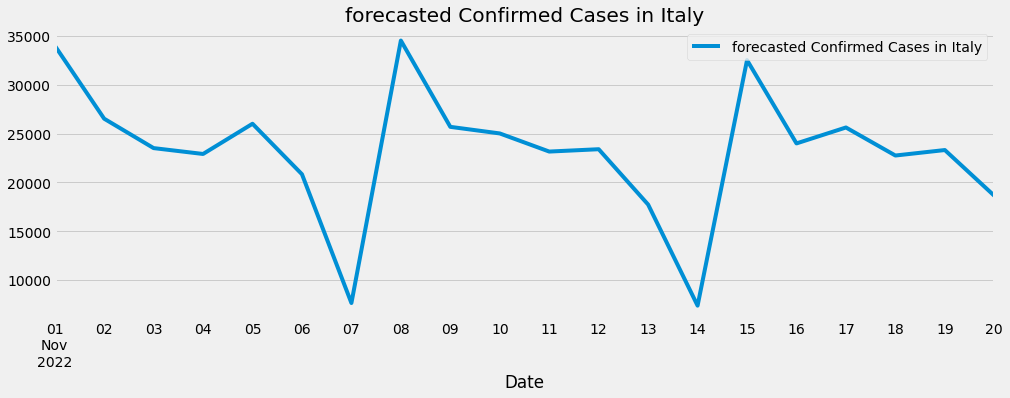

In [156]:
forecastedItaly=Confirem(dfconfirmItaly,'Number of Coronavirus Cases Over Time in Italy','forecasted Confirmed Cases in Italy')

In [157]:
forecastedItaly

Date  forecasted Confirmed Cases in Italy
0  2022-11-01                                34020
1  2022-11-02                                26521
2  2022-11-03                                23506
3  2022-11-04                                22905
4  2022-11-05                                26002
5  2022-11-06                                20827
6  2022-11-07                                 7630
7  2022-11-08                                34528
8  2022-11-09                                25684
9  2022-11-10                                25009
10 2022-11-11                                23152
11 2022-11-12                                23392
12 2022-11-13                                17719
13 2022-11-14                                 7361
14 2022-11-15                                32523
15 2022-11-16                                23987
16 2022-11-17                                25619
17 2022-11-18                                22746
18 2022-11-19                                23308
19 2022-11-20                                18623

<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


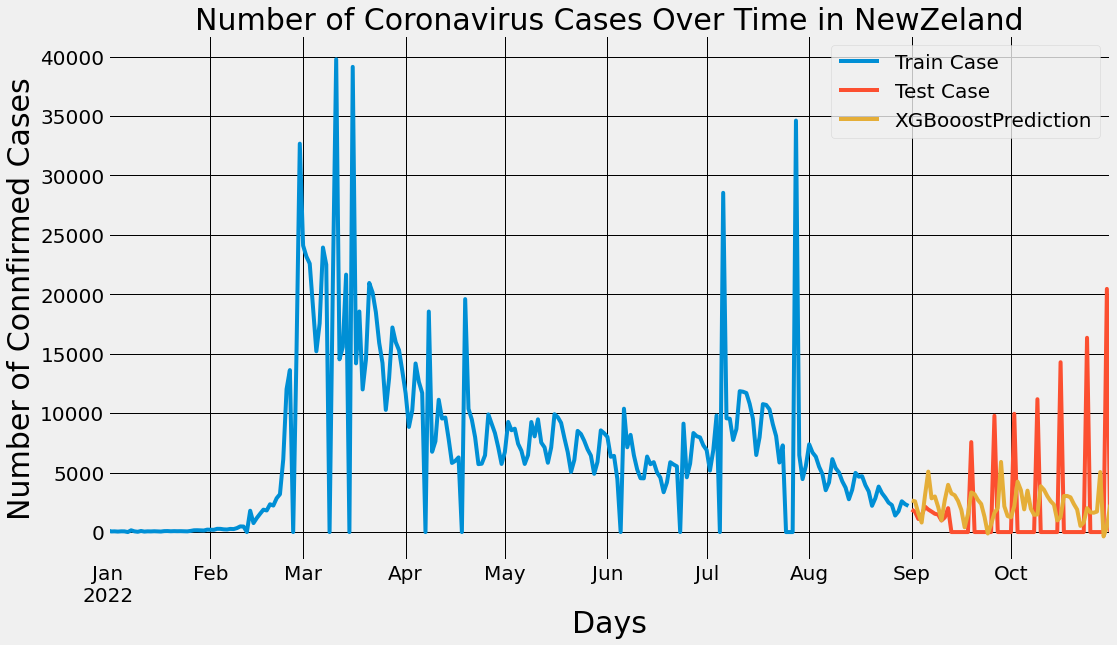

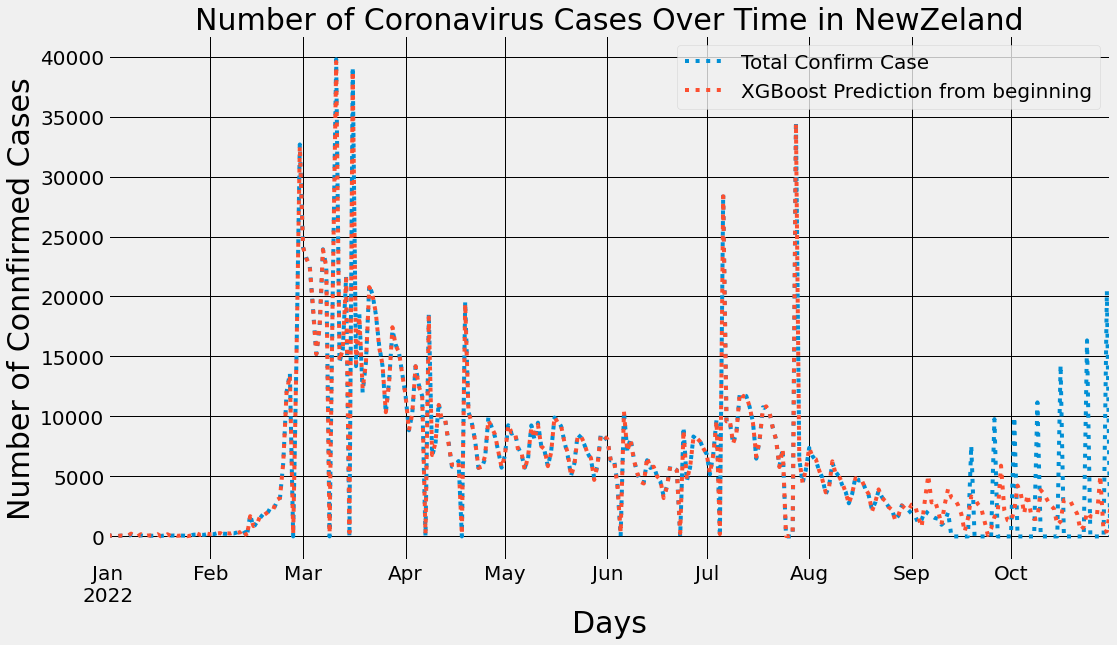

MAE :  3060.178323
MSE: 21666489.62662537
RMSE :  4654.727664
f MAE :  685.332237
f MSE: 4358559.233552632
 f RMSE :  2087.716272
R2 Score: -0.1961534027107319
f R2 Score: 0.9058559620131337
[03:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


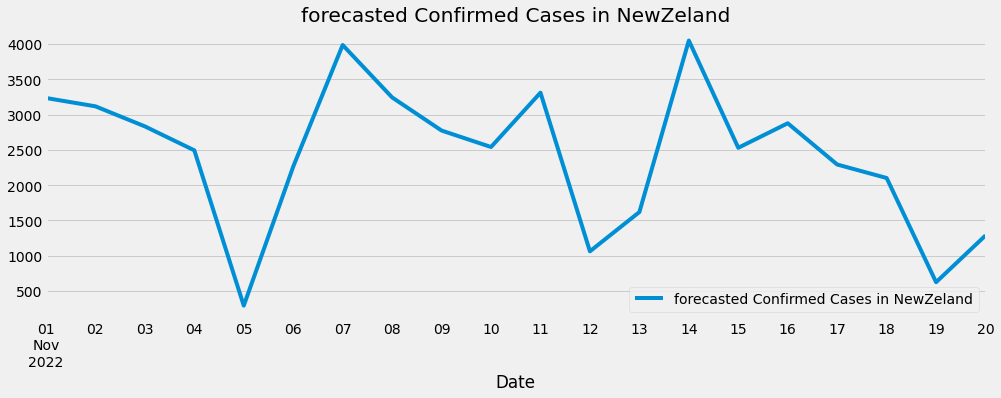

In [158]:
forecastedNewZeland=Confirem(dfconfirmNewzeland,'Number of Coronavirus Cases Over Time in NewZeland','forecasted Confirmed Cases in NewZeland')

In [159]:
forecastedNewZeland

Date  forecasted Confirmed Cases in NewZeland
0  2022-11-01                                     3234
1  2022-11-02                                     3116
2  2022-11-03                                     2832
3  2022-11-04                                     2493
4  2022-11-05                                      294
5  2022-11-06                                     2262
6  2022-11-07                                     3984
7  2022-11-08                                     3242
8  2022-11-09                                     2773
9  2022-11-10                                     2540
10 2022-11-11                                     3309
11 2022-11-12                                     1063
12 2022-11-13                                     1619
13 2022-11-14                                     4047
14 2022-11-15                                     2529
15 2022-11-16                                     2876
16 2022-11-17                                     2292
17 2022-11-18                                     2101
18 2022-11-19                                      626
19 2022-11-20                                     1288

<ipython-input-144-3d57b49f30cb>:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


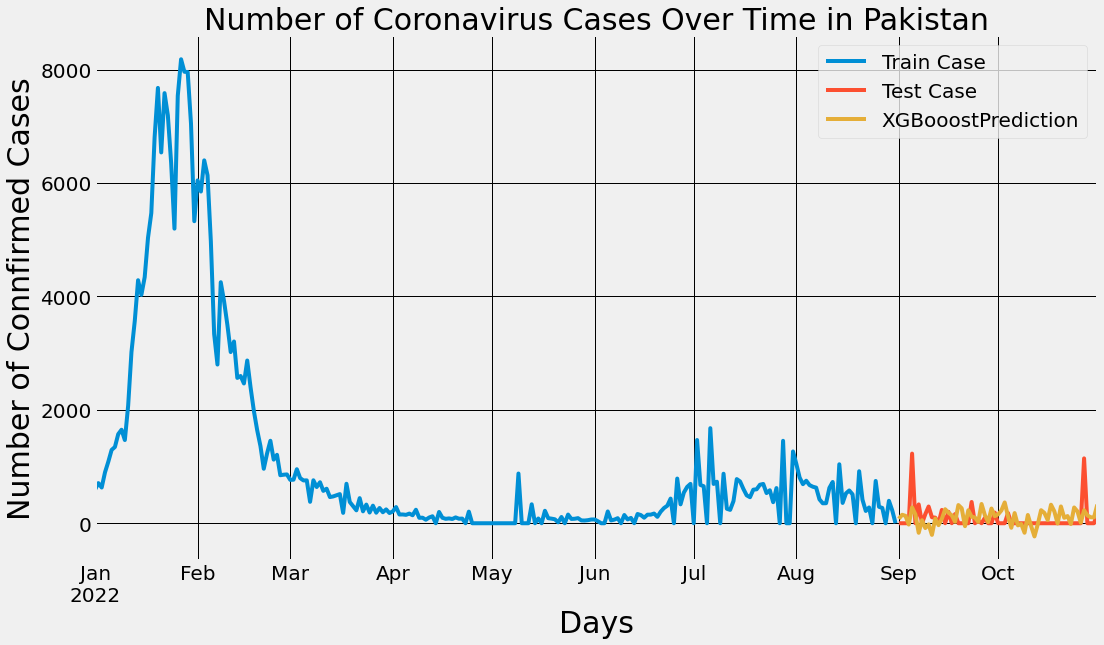

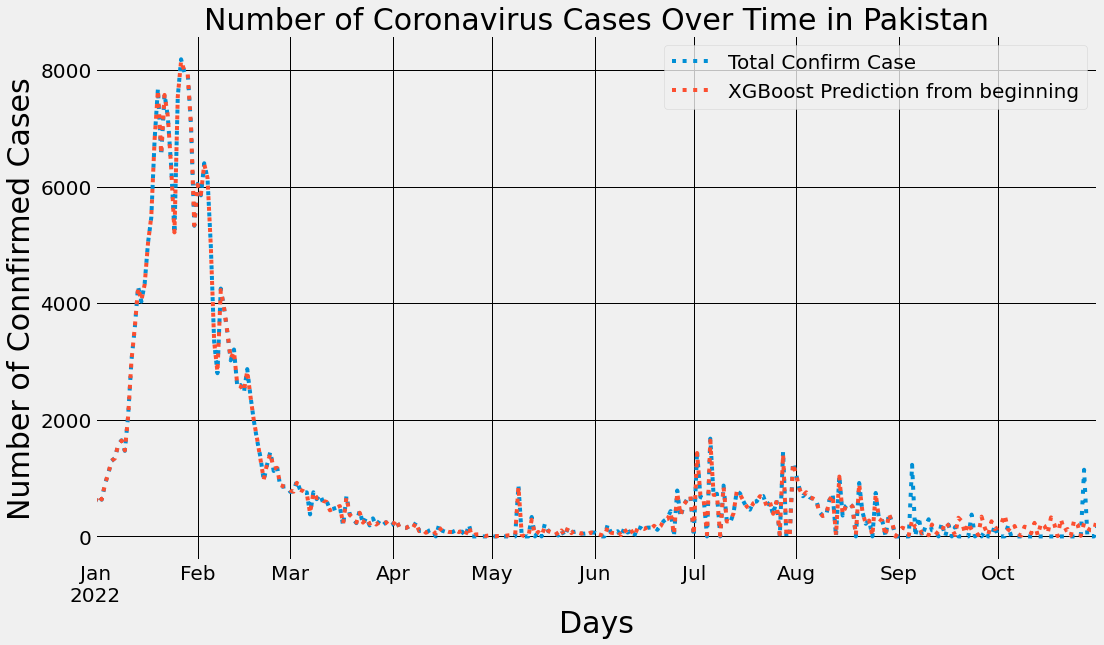

MAE :  177.680309
MSE: 62953.10443133839
RMSE :  250.904572
f MAE :  46.032895
f MSE: 11678.611842105263
 f RMSE :  108.067626
R2 Score: -0.27204368931917866
f R2 Score: 0.9960519674886896
[03:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-144-3d57b49f30cb>:127: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


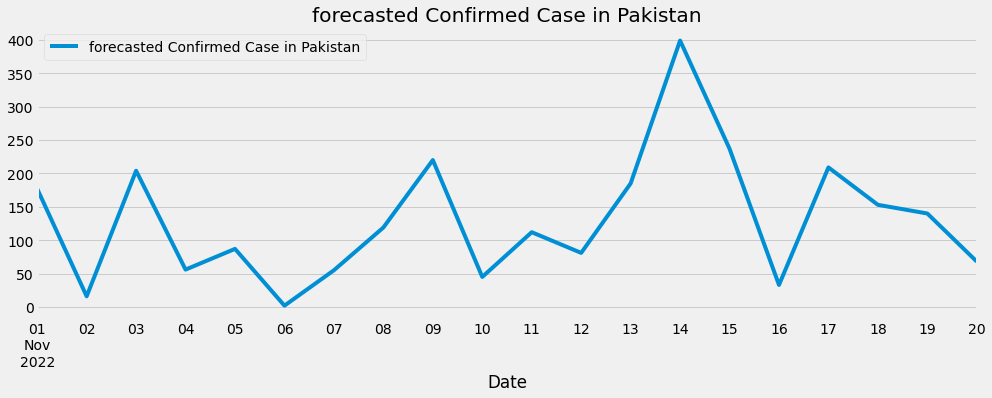

In [160]:
forecastedPakistan=Confirem(dfconfirmPakistan,'Number of Coronavirus Cases Over Time in Pakistan','forecasted Confirmed Case in Pakistan')

In [161]:
forecastedPakistan

Date  forecasted Confirmed Case in Pakistan
0  2022-11-01                                    177
1  2022-11-02                                     16
2  2022-11-03                                    204
3  2022-11-04                                     56
4  2022-11-05                                     87
5  2022-11-06                                      2
6  2022-11-07                                     55
7  2022-11-08                                    119
8  2022-11-09                                    220
9  2022-11-10                                     45
10 2022-11-11                                    112
11 2022-11-12                                     81
12 2022-11-13                                    185
13 2022-11-14                                    399
14 2022-11-15                                    237
15 2022-11-16                                     33
16 2022-11-17                                    209
17 2022-11-18                                    153
18 2022-11-19                                    140
19 2022-11-20                                     68

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


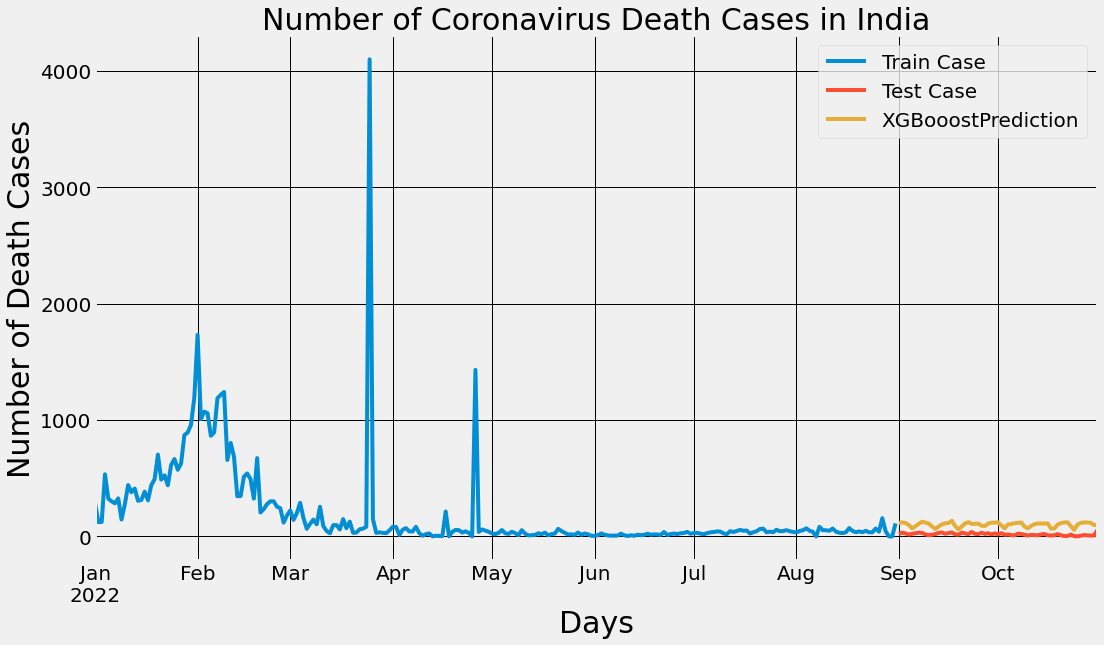

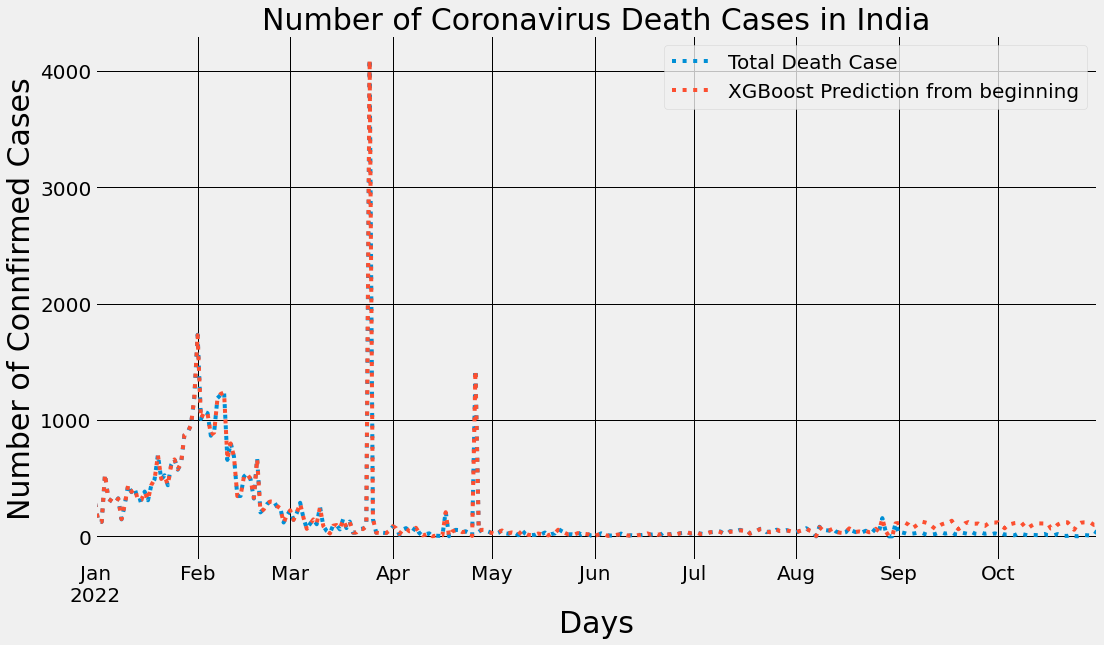

MAE :  83.413837
MSE: 7344.708268640032
RMSE :  85.701273
R2 Score: -71.9187597189126
f MAE :  19.132038
f MSE: 1485.0838751712163
 f RMSE :  38.536786
f R2 Score: 0.9878073338352588
[03:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


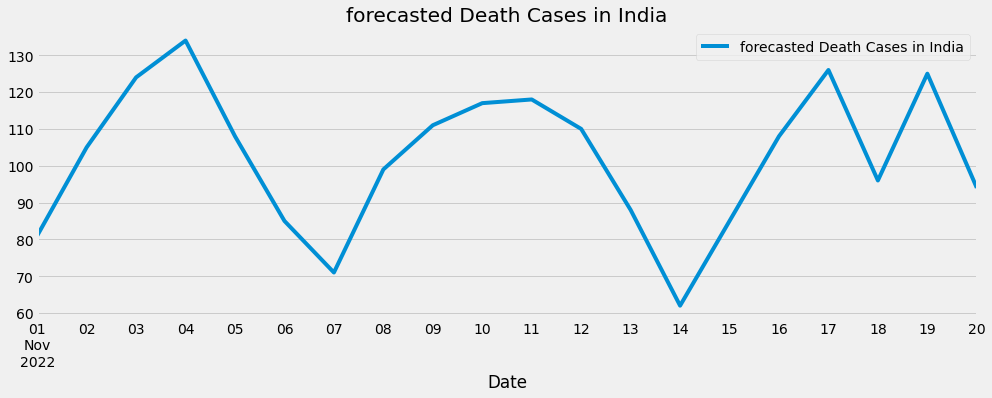

In [162]:
forecastedIndia=Death(dfdeathIndia,'Number of Coronavirus Death Cases in India','forecasted Death Cases in India')


In [163]:
forecastedIndia

Date  forecasted Death Cases in India
0  2022-11-01                               81
1  2022-11-02                              105
2  2022-11-03                              124
3  2022-11-04                              134
4  2022-11-05                              108
5  2022-11-06                               85
6  2022-11-07                               71
7  2022-11-08                               99
8  2022-11-09                              111
9  2022-11-10                              117
10 2022-11-11                              118
11 2022-11-12                              110
12 2022-11-13                               88
13 2022-11-14                               62
14 2022-11-15                               85
15 2022-11-16                              108
16 2022-11-17                              126
17 2022-11-18                               96
18 2022-11-19                              125
19 2022-11-20                               94

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


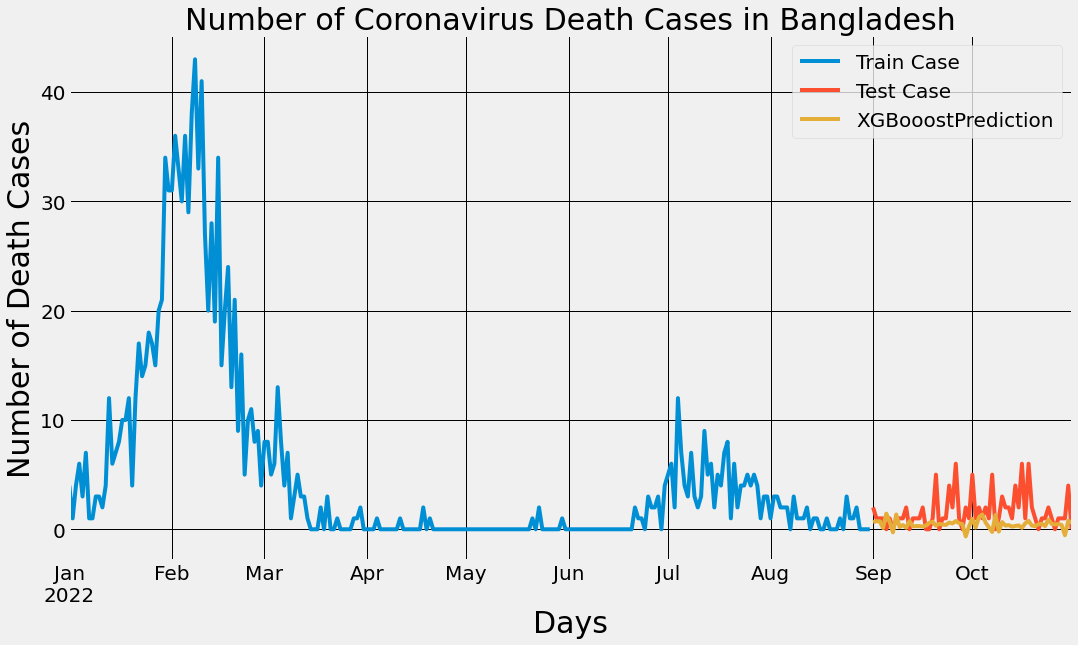

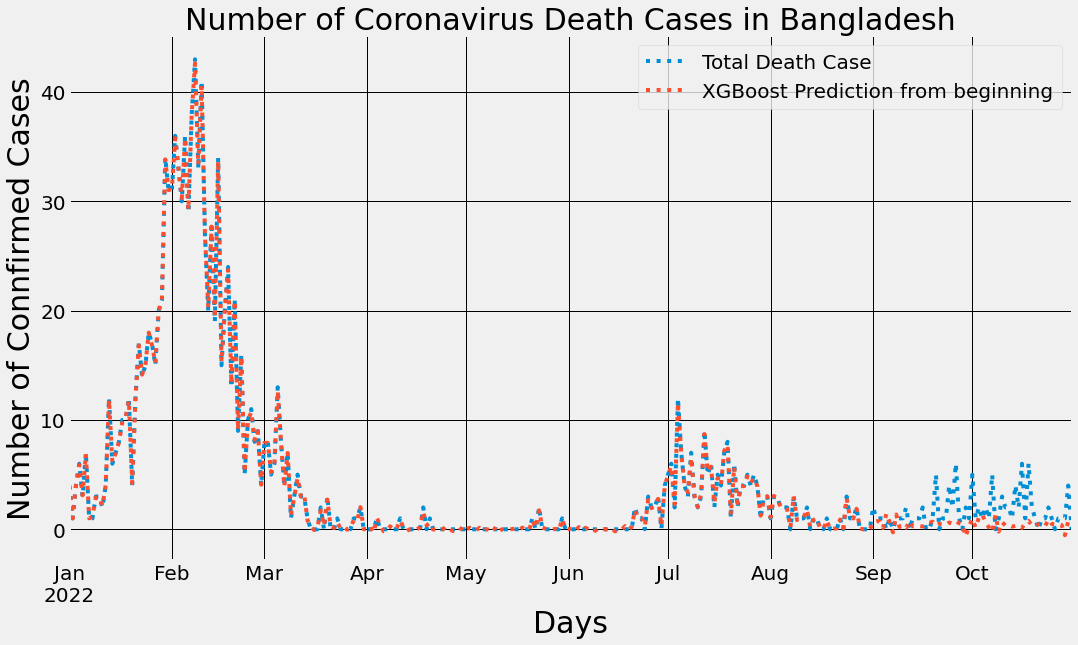

MAE :  1.425795
MSE: 4.0616145012746685
RMSE :  2.015345
R2 Score: -0.6292871452396545
f MAE :  0.399245
f MSE: 0.8413302593353799
 f RMSE :  0.917241
f R2 Score: 0.9870361518995185
[03:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


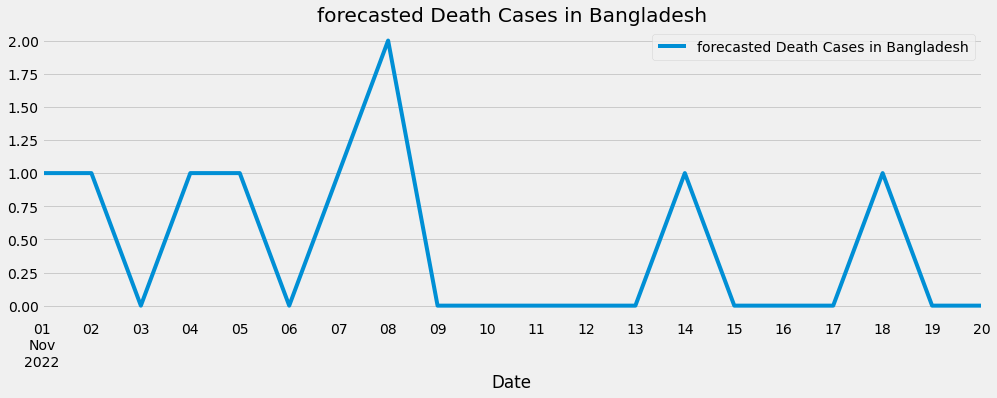

In [164]:
forecastedBangladesh=Death(dfdeathBangladesh,'Number of Coronavirus Death Cases in Bangladesh','forecasted Death Cases in Bangladesh')

In [165]:
forecastedBangladesh

Date  forecasted Death Cases in Bangladesh
0  2022-11-01                                     1
1  2022-11-02                                     1
2  2022-11-03                                     0
3  2022-11-04                                     1
4  2022-11-05                                     1
5  2022-11-06                                     0
6  2022-11-07                                     1
7  2022-11-08                                     2
8  2022-11-09                                     0
9  2022-11-10                                     0
10 2022-11-11                                     0
11 2022-11-12                                     0
12 2022-11-13                                     0
13 2022-11-14                                     1
14 2022-11-15                                     0
15 2022-11-16                                     0
16 2022-11-17                                     0
17 2022-11-18                                     1
18 2022-11-19                                     0
19 2022-11-20                                     0

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


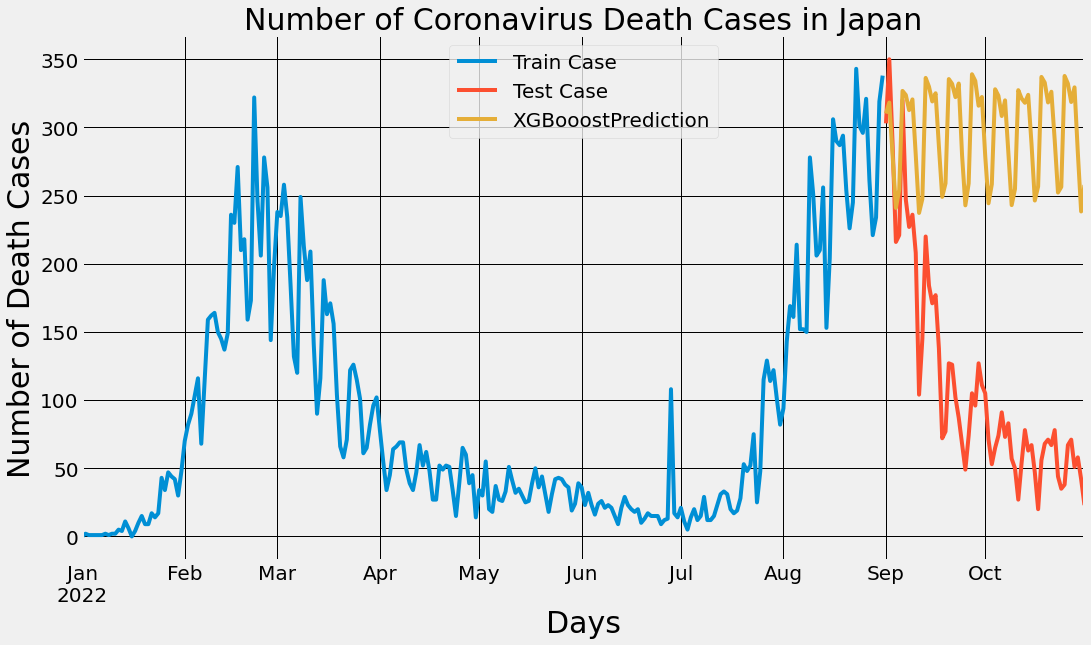

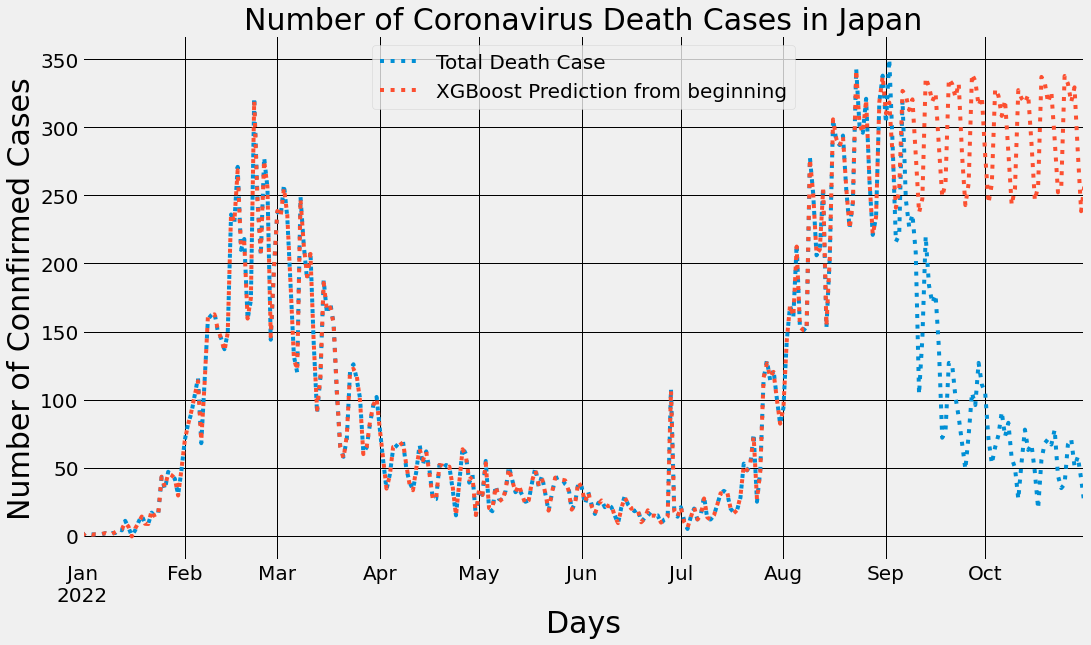

MAE :  186.236628
MSE: 40537.83968801569
RMSE :  201.340109
R2 Score: -5.492701648174122
f MAE :  38.173473
f MSE: 8135.6245446247995
 f RMSE :  90.197697
f R2 Score: -0.061965450022237745
[03:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


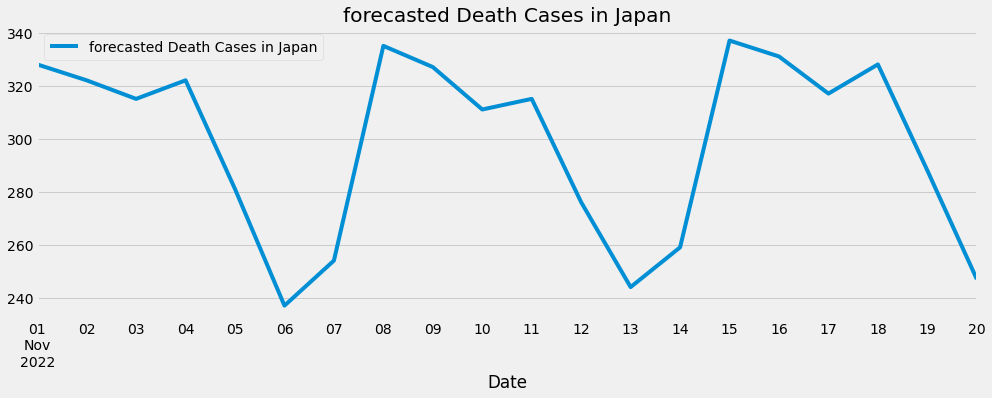

In [166]:
forecastedJapan=Death(dfdeathJapan,'Number of Coronavirus Death Cases in Japan','forecasted Death Cases in Japan')

In [167]:
forecastedJapan

Date  forecasted Death Cases in Japan
0  2022-11-01                              328
1  2022-11-02                              322
2  2022-11-03                              315
3  2022-11-04                              322
4  2022-11-05                              281
5  2022-11-06                              237
6  2022-11-07                              254
7  2022-11-08                              335
8  2022-11-09                              327
9  2022-11-10                              311
10 2022-11-11                              315
11 2022-11-12                              276
12 2022-11-13                              244
13 2022-11-14                              259
14 2022-11-15                              337
15 2022-11-16                              331
16 2022-11-17                              317
17 2022-11-18                              328
18 2022-11-19                              288
19 2022-11-20                              247

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


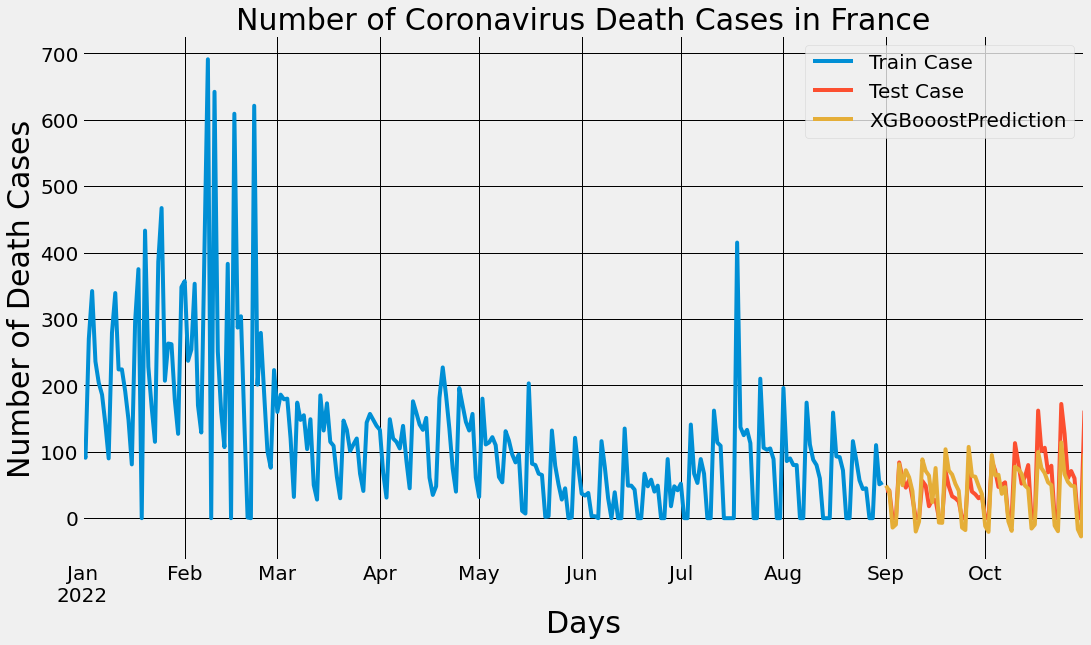

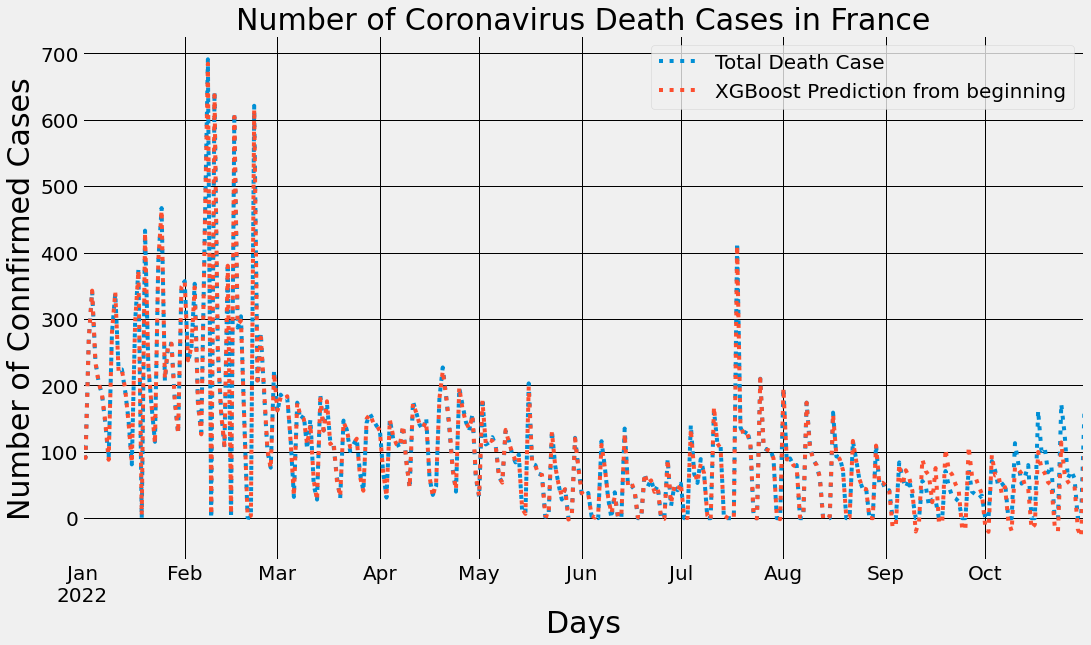

MAE :  20.563580
MSE: 656.2506747010929
RMSE :  25.617390
R2 Score: 0.6449240032544372
f MAE :  6.076771
f MSE: 139.57837874036795
 f RMSE :  11.814329
f R2 Score: 0.9884995862033081
[03:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


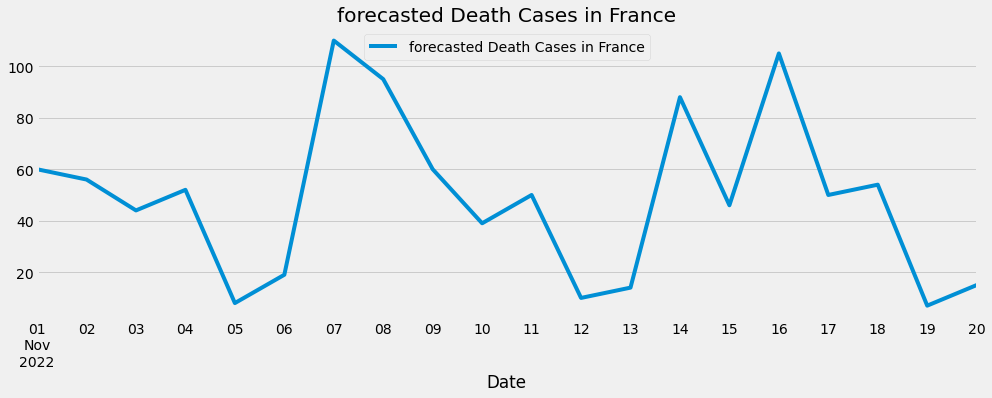

In [168]:
forecastedFrance=Death(dfdeathFrance,'Number of Coronavirus Death Cases in France','forecasted Death Cases in France')

In [169]:
forecastedFrance

Date  forecasted Death Cases in France
0  2022-11-01                                60
1  2022-11-02                                56
2  2022-11-03                                44
3  2022-11-04                                52
4  2022-11-05                                 8
5  2022-11-06                                19
6  2022-11-07                               110
7  2022-11-08                                95
8  2022-11-09                                60
9  2022-11-10                                39
10 2022-11-11                                50
11 2022-11-12                                10
12 2022-11-13                                14
13 2022-11-14                                88
14 2022-11-15                                46
15 2022-11-16                               105
16 2022-11-17                                50
17 2022-11-18                                54
18 2022-11-19                                 7
19 2022-11-20                                15

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


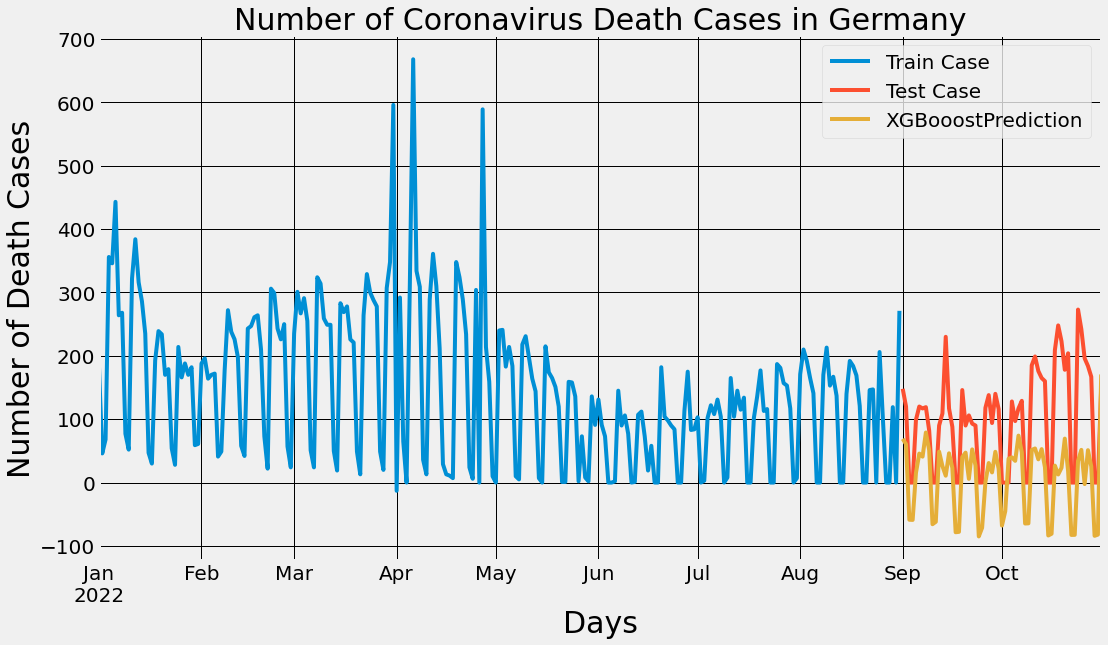

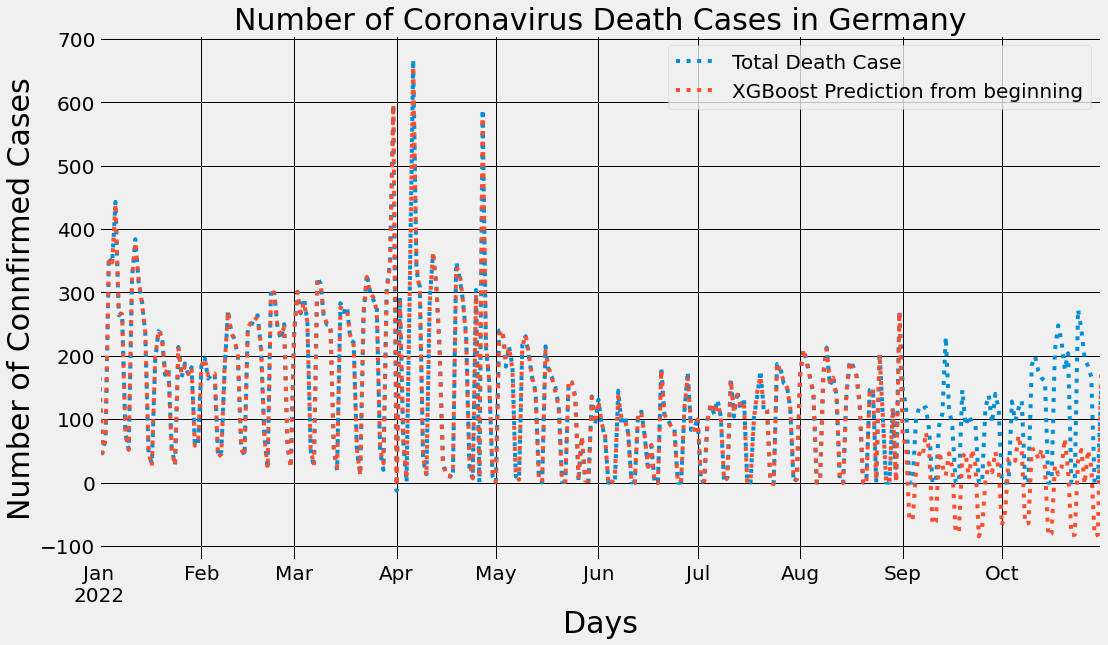

MAE :  96.242553
MSE: 11894.915835751946
RMSE :  109.063815
R2 Score: -0.8642724294811417
f MAE :  21.989614
f MSE: 2401.965762191267
 f RMSE :  49.009854
f R2 Score: 0.8154236230077294
[03:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


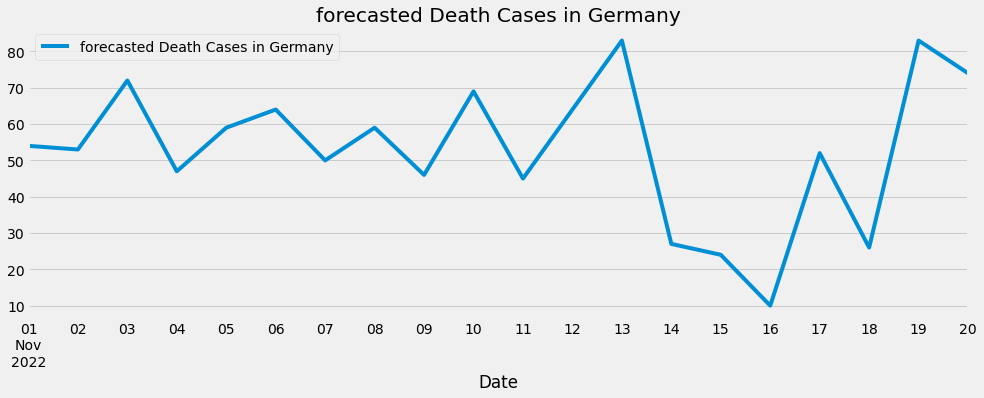

In [170]:
forecastedGermany=Death(dfdeathGermany,'Number of Coronavirus Death Cases in Germany','forecasted Death Cases in Germany')

In [171]:
forecastedGermany

Date  forecasted Death Cases in Germany
0  2022-11-01                                 54
1  2022-11-02                                 53
2  2022-11-03                                 72
3  2022-11-04                                 47
4  2022-11-05                                 59
5  2022-11-06                                 64
6  2022-11-07                                 50
7  2022-11-08                                 59
8  2022-11-09                                 46
9  2022-11-10                                 69
10 2022-11-11                                 45
11 2022-11-12                                 64
12 2022-11-13                                 83
13 2022-11-14                                 27
14 2022-11-15                                 24
15 2022-11-16                                 10
16 2022-11-17                                 52
17 2022-11-18                                 26
18 2022-11-19                                 83
19 2022-11-20                                 74

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


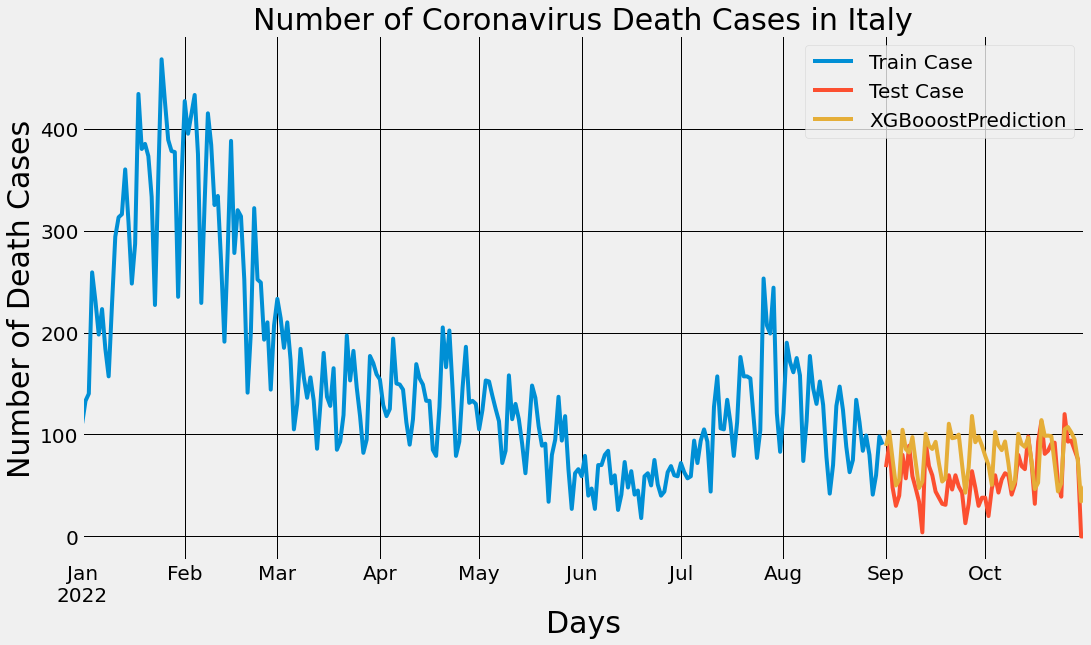

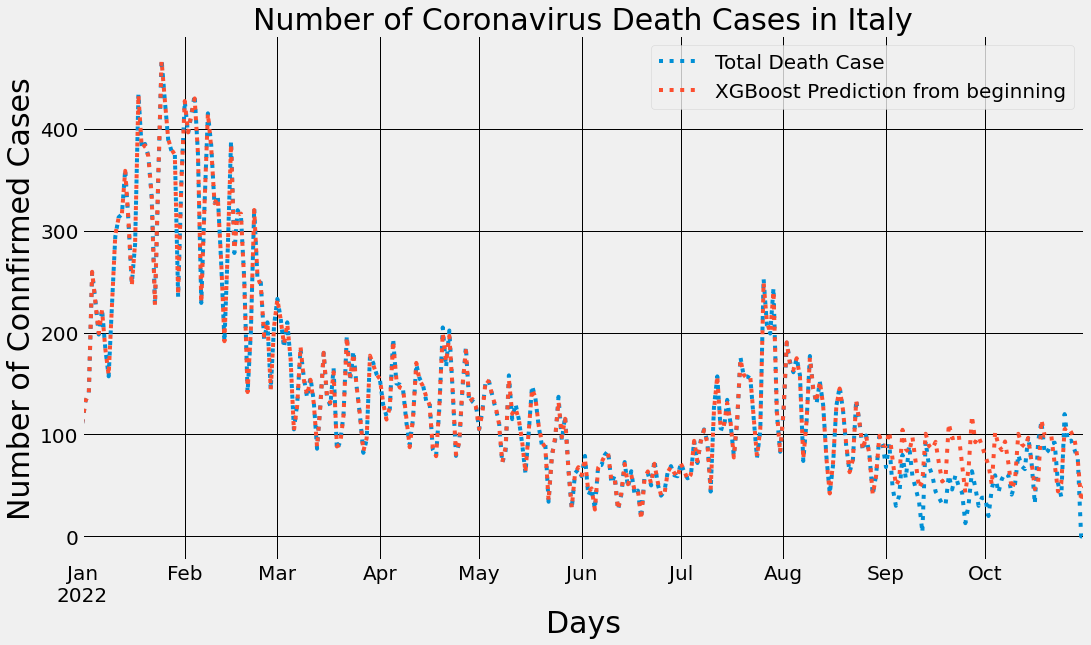

MAE :  25.671125
MSE: 933.4296730129159
RMSE :  30.552081
R2 Score: -0.31684195784680136
f MAE :  6.480861
f MSE: 190.78128304390353
 f RMSE :  13.812360
f R2 Score: 0.9799817407814847
[03:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


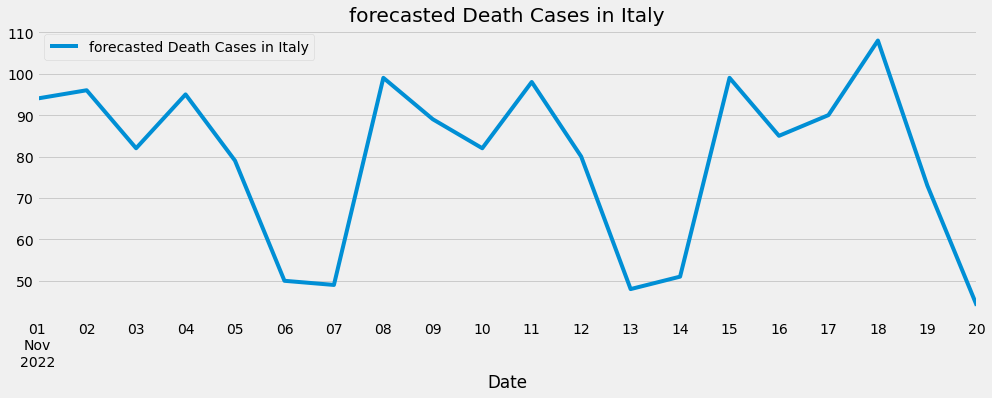

In [172]:
forecastedItaly=Death(dfdeathItaly,'Number of Coronavirus Death Cases in Italy','forecasted Death Cases in Italy')

In [173]:
forecastedItaly

Date  forecasted Death Cases in Italy
0  2022-11-01                               94
1  2022-11-02                               96
2  2022-11-03                               82
3  2022-11-04                               95
4  2022-11-05                               79
5  2022-11-06                               50
6  2022-11-07                               49
7  2022-11-08                               99
8  2022-11-09                               89
9  2022-11-10                               82
10 2022-11-11                               98
11 2022-11-12                               80
12 2022-11-13                               48
13 2022-11-14                               51
14 2022-11-15                               99
15 2022-11-16                               85
16 2022-11-17                               90
17 2022-11-18                              108
18 2022-11-19                               73
19 2022-11-20                               44

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


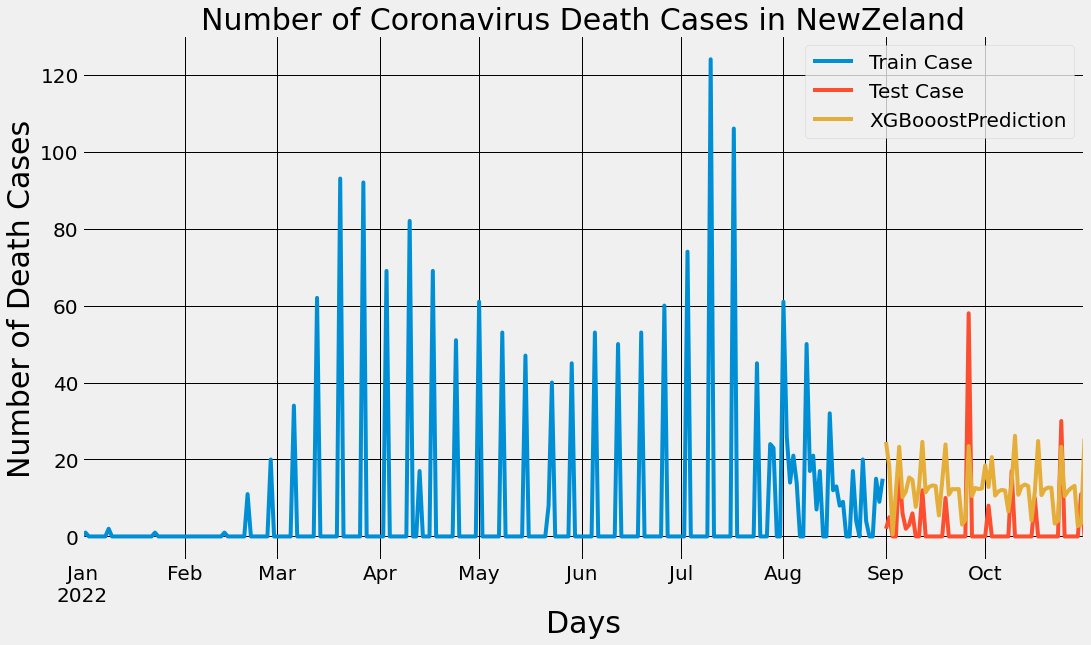

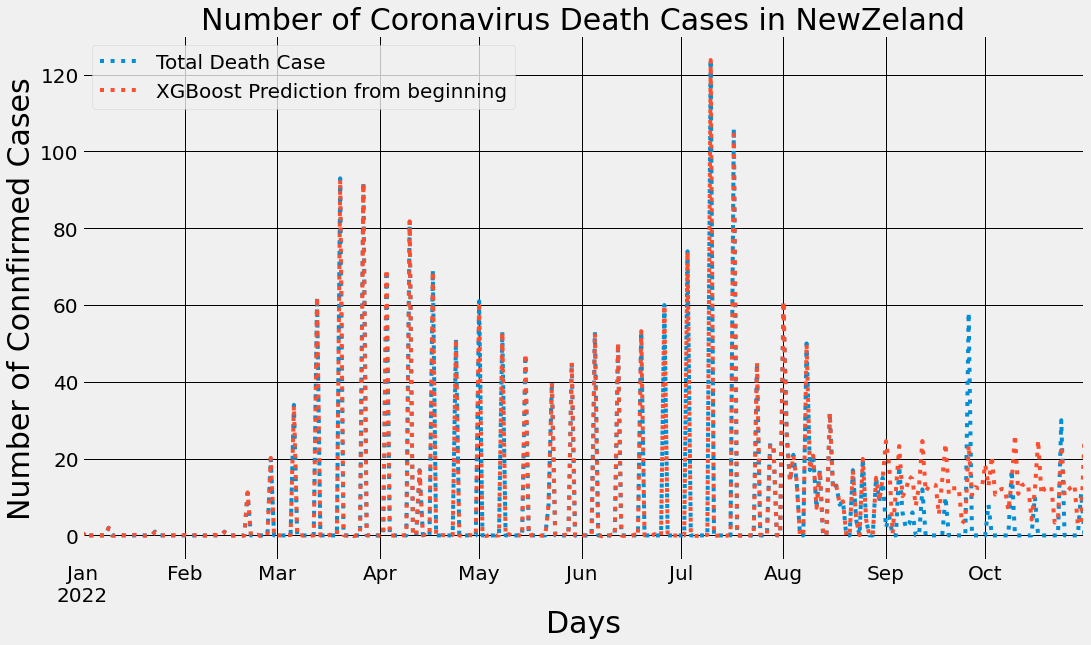

MAE :  11.409379
MSE: 168.69762704777378
RMSE :  12.988365
R2 Score: -1.1098827298187874
f MAE :  2.371783
f MSE: 33.86413581344379
 f RMSE :  5.819290
f R2 Score: 0.9010408435018225
[03:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


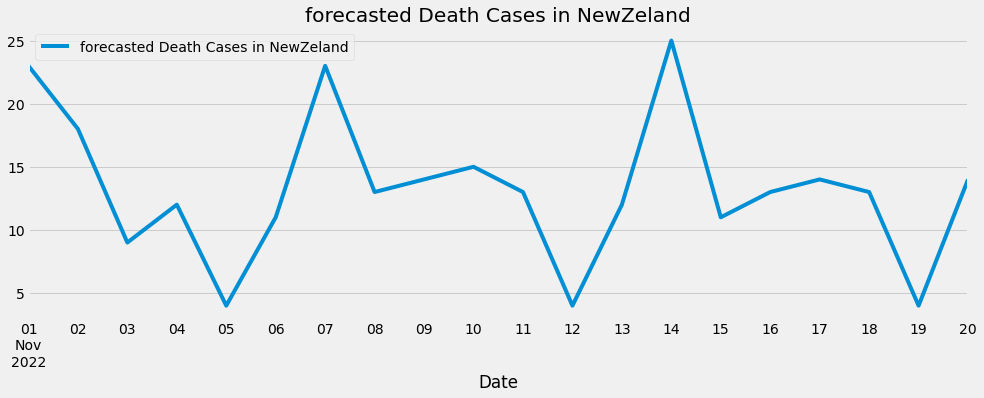

In [174]:
forecastedNewZeland=Death(dfdeathNewzeland,'Number of Coronavirus Death Cases in NewZeland','forecasted Death Cases in NewZeland')

In [175]:
forecastedNewZeland

Date  forecasted Death Cases in NewZeland
0  2022-11-01                                   23
1  2022-11-02                                   18
2  2022-11-03                                    9
3  2022-11-04                                   12
4  2022-11-05                                    4
5  2022-11-06                                   11
6  2022-11-07                                   23
7  2022-11-08                                   13
8  2022-11-09                                   14
9  2022-11-10                                   15
10 2022-11-11                                   13
11 2022-11-12                                    4
12 2022-11-13                                   12
13 2022-11-14                                   25
14 2022-11-15                                   11
15 2022-11-16                                   13
16 2022-11-17                                   14
17 2022-11-18                                   13
18 2022-11-19                                    4
19 2022-11-20                                   14

<ipython-input-145-a6509ef9a514>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


[03:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


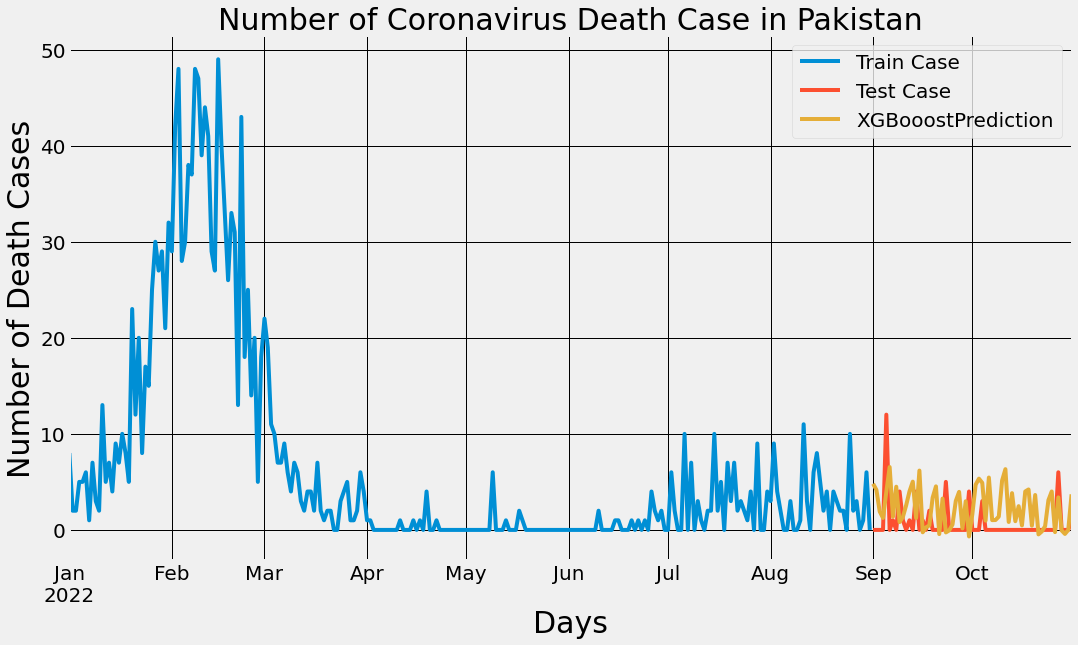

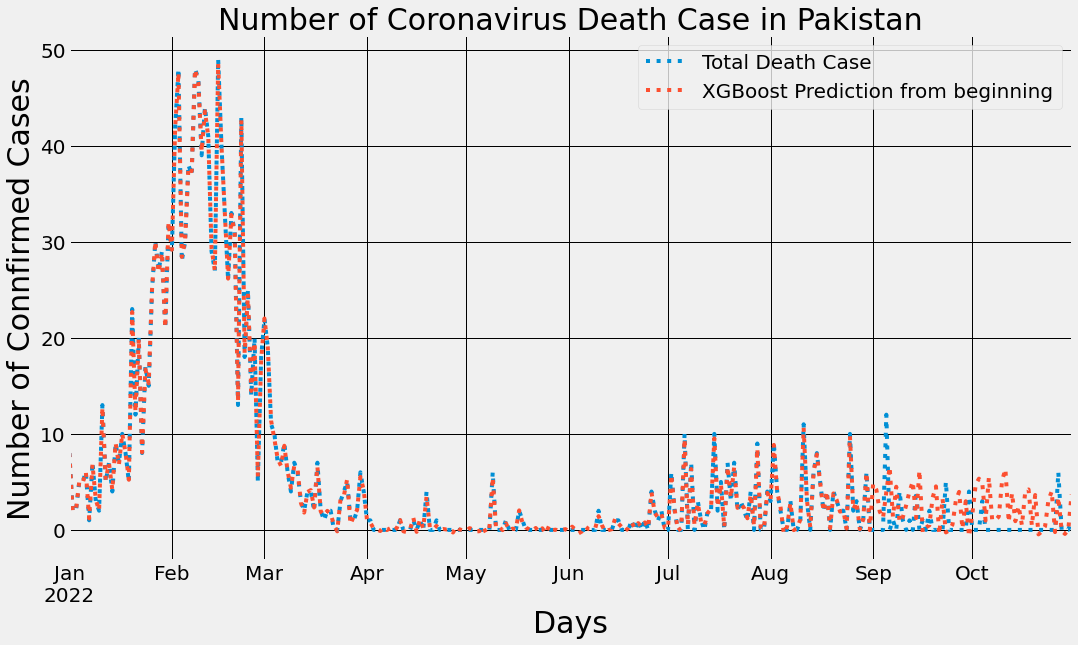

MAE :  2.619364
MSE: 10.962340117591745
RMSE :  3.310942
R2 Score: -1.8119996951302144
f MAE :  0.693924
f MSE: 2.2534577251659123
 f RMSE :  1.501152
f R2 Score: 0.9792776403658489
[03:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-145-a6509ef9a514>:115: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


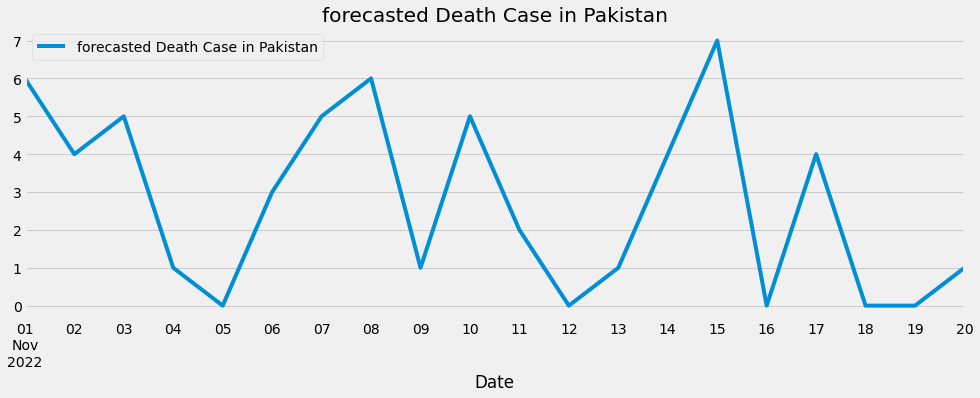

In [176]:
forecastedPakistan=Death(dfdeathPakistan,'Number of Coronavirus Death Case in Pakistan','forecasted Death Case in Pakistan')

In [177]:
forecastedPakistan

Date  forecasted Death Case in Pakistan
0  2022-11-01                                  6
1  2022-11-02                                  4
2  2022-11-03                                  5
3  2022-11-04                                  1
4  2022-11-05                                  0
5  2022-11-06                                  3
6  2022-11-07                                  5
7  2022-11-08                                  6
8  2022-11-09                                  1
9  2022-11-10                                  5
10 2022-11-11                                  2
11 2022-11-12                                  0
12 2022-11-13                                  1
13 2022-11-14                                  4
14 2022-11-15                                  7
15 2022-11-16                                  0
16 2022-11-17                                  4
17 2022-11-18                                  0
18 2022-11-19                                  0
19 2022-11-20                                  1